In [2]:
%run formality_cleaning.py


length of people who did all 32 rounds (2 practice):  534
Turkers who started: 169
Turkers who finished: 109


/Users/talaugust/Documents/LITW/LITW_Data_Analysis/Formality_A_B_testing/formality_cleaning.py:186: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  comments['uuid'] = comments.data.apply(pd.Series)['uuid']


Before cheating removed: 492
After cheating removed: 466
After technical removed: 456
Before retake and annoying education person: 456
After retake and annoying education person:: 442
Before time: 442
after time: 433
Before dem drop: 433
after dem drop: 369
Done cleaning formality data
Total number of full participants (completed up through comments): 369


/Users/talaugust/Documents/LITW/LITW_Data_Analysis/Formality_A_B_testing/formality_cleaning.py:187: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  irb_checkpoint['uuid'] = irb_checkpoint.data.apply(pd.Series)['uuid']
/Users/talaugust/Documents/LITW/LITW_Data_Analysis/Formality_A_B_testing/formality_cleaning.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  comments['timestamp'] = pd.to_datetime(comments['timestamp'])
/Users/talaugust/Documents/LITW/LITW_Data_Analysis/Formality_A_B_testing/formality_cleaning.py:191: SettingWithCopyWarning

In [11]:
%whos


Variable                          Type                          Data/Info
-------------------------------------------------------------------------
attention_checks_df               DataFrame                                              <...>n\n[602 rows x 2 columns]
checkpoints                       DataFrame                               id             <...>n[23939 rows x 3 columns]
comments                          DataFrame                               id             <...>n\n[536 rows x 4 columns]
csv                               module                        <module 'csv' from '/User<...>36/lib/python3.6/csv.py'>
decode_json_entry                 function                      <function decode_json_entry at 0x1a20c76400>
df                                DataFrame                               id             <...>n[47209 rows x 3 columns]
df_checkpoints                    DataFrame                                              <...>\n[1021 rows x 3 columns]
df_comments            

In [13]:
### Setting plot styles
sns.color_palette('colorblind')
# sns.set()
### Define dfs that are needed 

df_turk = df_dem_formality_values[df_dem_formality_values['Turker'] == True]
df_litw = df_dem_formality_values[df_dem_formality_values['Turker'] == False]

df_formal = df_dem_formality_values[df_dem_formality_values['formality_level'] == 'formal']
df_informal = df_dem_formality_values[df_dem_formality_values['formality_level'] == 'informal']

df_formal_turk = df_turk[df_turk['formality_level'] == 'formal']
df_informal_turk = df_turk[df_turk['formality_level'] == 'informal']

df_formal_litw = df_litw[df_litw['formality_level'] == 'formal']
df_informal_litw = df_litw[df_litw['formality_level'] == 'informal']

df_turk_dropout = df_formality_dropout[df_formality_dropout['Turker'] == True]
df_litw_dropout = df_formality_dropout[df_formality_dropout['Turker'] == False]

df_formal_dropout = df_formality_dropout[df_formality_dropout['formality_level'] == 'formal']
df_informal_dropout = df_formality_dropout[df_formality_dropout['formality_level'] == 'informal']

df_formal_turk_dropout = df_turk_dropout[df_turk_dropout['formality_level'] == 'formal']
df_informal_turk_dropout = df_turk_dropout[df_turk_dropout['formality_level'] == 'informal']

df_formal_litw_dropout = df_litw_dropout[df_litw_dropout['formality_level'] == 'formal']
df_informal_litw_dropout = df_litw_dropout[df_litw_dropout['formality_level'] == 'informal']

# Reset some values to make legends more clear
df_dem_formality_values.replace(to_replace={'Turker' : {True: 'MTurk(Paid)', False: 'LabintheWild(Volunteer)'}}, inplace = True)


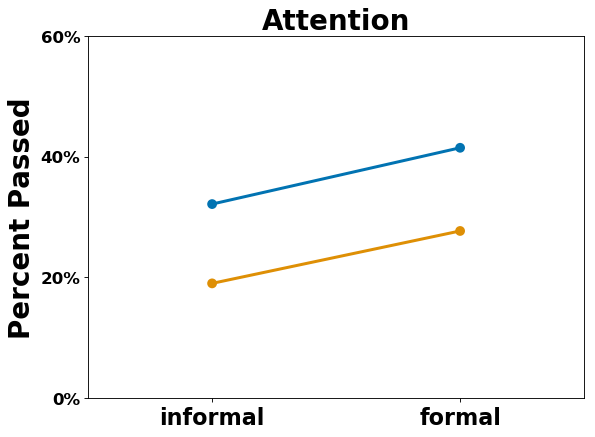

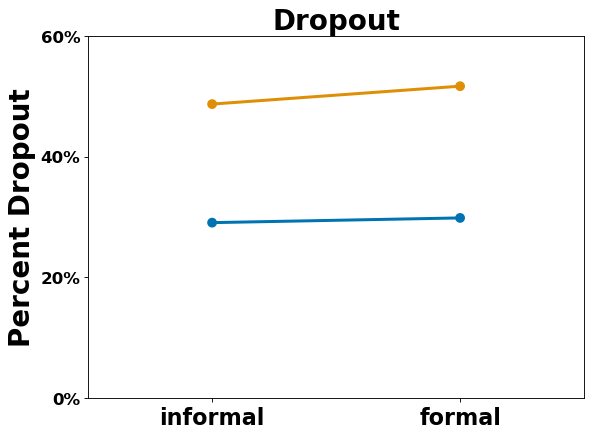

/Users/talaugust/anaconda3/envs/py36/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


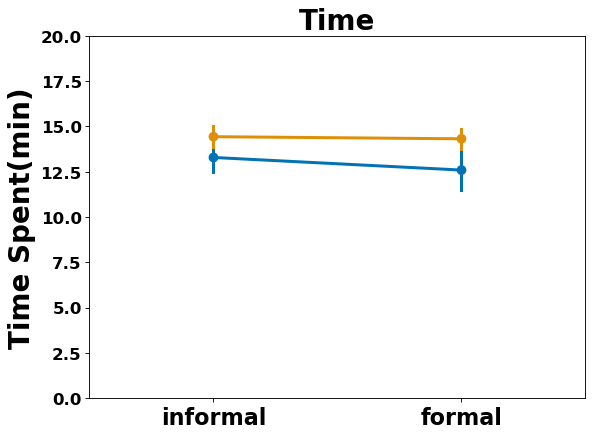

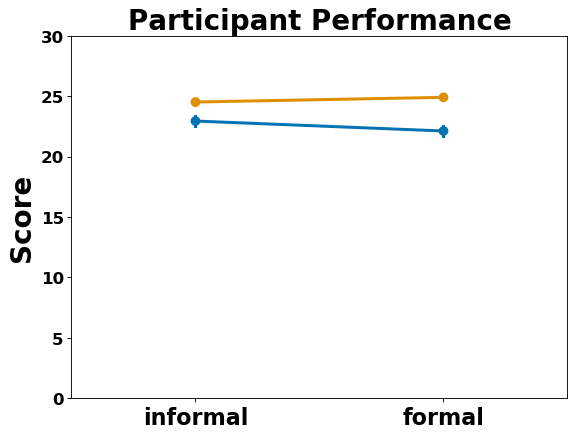

In [21]:

##########################
### Attention
##########################
plt.figure(figsize=(8, 6), dpi=80)

# Attention is weird because need to calculate a percentage, much more involved than the rest
x = [df_formal_turk.engaged.sum()/len(df_formal_turk),
    df_informal_turk.engaged.sum()/len(df_informal_turk),
    df_formal_litw.engaged.sum()/len(df_formal_litw),
    df_informal_litw.engaged.sum()/len(df_informal_litw) 
]

df_attention_plot = pd.DataFrame(columns=['platform', 'engaged_percent', 'formality_level'])
df_attention_plot['platform'] = ['MTurk(Paid)', 'MTurk(Paid)', 'LabintheWild(Volunteer)', 'LabintheWild(Volunteer)']
df_attention_plot['formality_level'] = ['formal', 'informal', 'formal', 'informal'] 
df_attention_plot['engaged_percent'] = x
sns.pointplot(x="formality_level", y="engaged_percent", kind='point', hue="platform",
              data=df_attention_plot, order=['informal', 'formal'], hue_order=['MTurk(Paid)', 'LabintheWild(Volunteer)'],
             palette='colorblind')

plt.title("Attention", fontsize=25, fontweight='bold')

plt.ylabel("Percent Passed", fontsize=25, fontweight='bold')
plt.ylim(0, .6)
plt.yticks([0, .20, .40, .60], [ '0%', '20%', '40%', '60%'], fontsize=15, fontweight='bold' )

plt.legend(fontsize=30, loc='best').remove()
plt.xlabel('', fontsize=25, fontweight='bold')
plt.xticks(fontsize=20, fontweight='bold')

plt.show()


##########################
### Dropout
##########################
plt.figure(figsize=(8, 6), dpi=80)

# Dropout is not sot of weird too 
x = [df_formal_turk_dropout['dropout'].sum()/len(df_formal_turk_dropout),
    df_informal_turk_dropout['dropout'].sum()/len(df_informal_turk_dropout),
    df_formal_litw_dropout['dropout'].sum()/len(df_formal_litw_dropout),
    df_informal_litw_dropout['dropout'].sum()/len(df_informal_litw_dropout) 
]

df_dropout_plot = pd.DataFrame(columns=['platform', 'dropout_percent', 'formality_level'])
df_dropout_plot['platform'] = ['MTurk(Paid)', 'MTurk(Paid)', 'LabintheWild(Volunteer)', 'LabintheWild(Volunteer)']
df_dropout_plot['formality_level'] = ['formal', 'informal', 'formal', 'informal'] 
df_dropout_plot['dropout_percent'] = x
sns.pointplot(x="formality_level", y="dropout_percent", kind='point', hue="platform",
              data=df_dropout_plot, order=['informal', 'formal'], hue_order=['MTurk(Paid)', 'LabintheWild(Volunteer)'],
             palette='colorblind')

plt.title("Dropout", fontsize=25, fontweight='bold')

plt.ylabel("Percent Dropout", fontsize=25, fontweight='bold')
plt.ylim(0, .6)
plt.yticks([0, .20, .40, .60], [ '0%', '20%', '40%', '60%'], fontsize=15, fontweight='bold' )

plt.legend(fontsize=30, loc='best').remove()
plt.xlabel('', fontsize=25, fontweight='bold')
plt.xticks(fontsize=20, fontweight='bold')

plt.show()


##########################
### Time
##########################

plt.figure(figsize=(8, 6), dpi=80)
sns.pointplot(x="formality_level", y="time_diff", hue="Turker", kind='point', 
              data=df_dem_formality_values, order=['informal', 'formal'],hue_order=['MTurk(Paid)', 'LabintheWild(Volunteer)'], ci=68, palette='colorblind')
plt.ylabel("Time Spent(min)", fontsize=25, fontweight='bold')
plt.ylim(0, 20)
plt.yticks(fontsize=15, fontweight='bold' )

plt.title("Time", fontsize=25, fontweight='bold')
plt.legend(loc='best',fontsize=20).remove()
plt.xlabel('', fontsize=25, fontweight='bold')
plt.xticks(fontsize=20, fontweight='bold')
plt.show()

##########################
### Score
##########################
plt.figure(figsize=(8, 6), dpi=80)

sns.pointplot(x="formality_level", y="score", hue="Turker", kind='point',
              data=df_dem_formality_values, order=['informal', 'formal'], hue_order=['MTurk(Paid)', 'LabintheWild(Volunteer)'], ci=68, palette='colorblind')
plt.ylabel("Score", fontsize=25, fontweight='bold')
plt.ylim(0, 30)
plt.yticks(fontsize=15, fontweight='bold' )

plt.legend(loc='best',fontsize=20).remove()
plt.title("Participant Performance", fontsize=25, fontweight='bold')
plt.xlabel('', fontsize=25, fontweight='bold')
plt.xticks(fontsize=20, fontweight='bold')
plt.legend([]).remove()
plt.show()

In [17]:


## Making plot df
x = [df_formal_turk_dropout['dropout'].sum()/len(df_formal_turk_dropout),
    df_informal_turk_dropout['dropout'].sum()/len(df_informal_turk_dropout),
    df_formal_litw_dropout['dropout'].sum()/len(df_formal_litw_dropout),
    df_informal_litw_dropout['dropout'].sum()/len(df_informal_litw_dropout) 
]

df_time_plot = pd.DataFrame(columns=['platform', 'dropout_percent', 'formality_level'])
df_dropout_plot['platform'] = ['MTurk(Paid)', 'MTurk(Paid)', 'LabintheWild(Volunteer)', 'LabintheWild(Volunteer)']
df_dropout_plot['formality_level'] = ['formal', 'informal', 'formal', 'informal'] 
df_dropout_plot['dropout_percent'] = x

In [46]:
sns.color_palette('colorblind').as_hex()

['#0173b2',
 '#de8f05',
 '#029e73',
 '#d55e00',
 '#cc78bc',
 '#ca9161',
 '#fbafe4',
 '#949494',
 '#ece133',
 '#56b4e9']

In [6]:
df_turk

NameError: name 'df_turk' is not defined

In [88]:
# df_score_uuid_grouped.get_group('04e92bf9-ba34-4bfc-897c-39a470de1c18').plot(x='trial_index', y='is_correct')

/Users/talaugust/anaconda3/envs/py36/lib/python3.6/site-packages/pandas/core/generic.py:5821: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  regex=regex)
/Users/talaugust/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/Users/talaugust/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the

32
32
32
32
5
32
32
32
32
32
32
32
32
5
32
32
17
32
32
32
32
32
32
32
32


/Users/talaugust/anaconda3/envs/py36/lib/python3.6/site-packages/matplotlib/pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


32
32
32
32
32
7
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
30
32
32
32
32
32
32
32
32
32
32
32
32
32
32
17
32
32
32
32
32
32
32
32
32
32
32
2
2
32
32
32
5
32
32
32
2
32
32
32
32
32
2
32
32
32
32
32
32
32
32
32
32
32
17
17
32
32
32
32
32
32
32
32
12
31
32
32
32
32
32
32
32
32
32
32
32
32
8
1
32
32
32
32
3
32
32
32
32
32
32
32
32
32
32
17
32
10
32
32
32
32
32
32
9
32
2
32
32
32
32
32
32
2
32
32
32
32
32
32
32
4
32
32
32
32
32
32
12
32
32
32
32
32
32
32
32
32
32
4
32
32
32
32
32
8
32
32
32
32
32
32
32
22
32
32
32
32
2
32
32
32
32
32
32
32
32
32
32
32
32
32
8
32
32
32
32
32
32
32
32
32
32
32
32
17
32
32
32
2
31
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
11
17
32
32
32
3
32
32
32
15
32
32
32
13
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
21
32
32
32
32
32
32
34
16
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
17
32
32
32
32
32
32
32
32
32
32
32
32
32
32
6
32
32
32
32
32
32
32
2
32
32
32
32
32
11
32
32
32
32
32
32
32
17
32
32
2
32
32
32

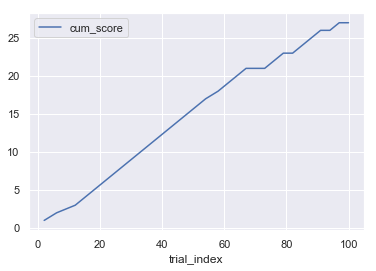

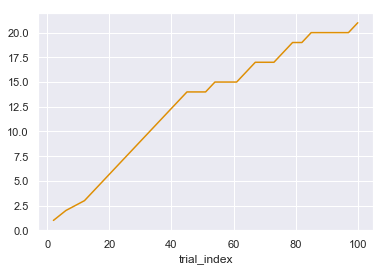

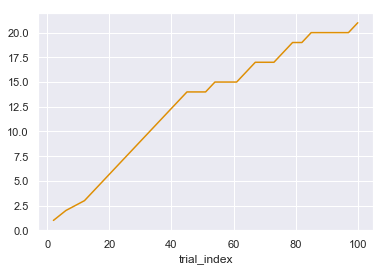

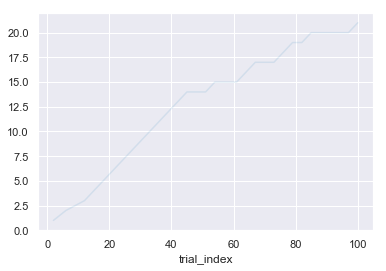

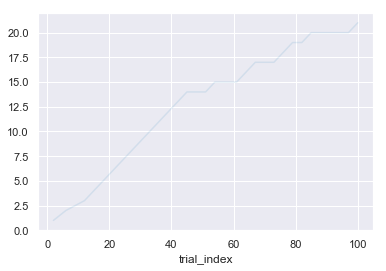

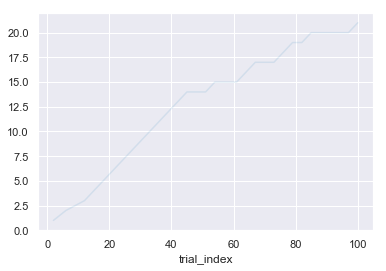

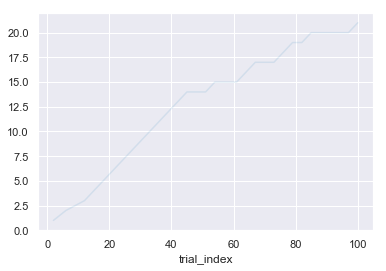

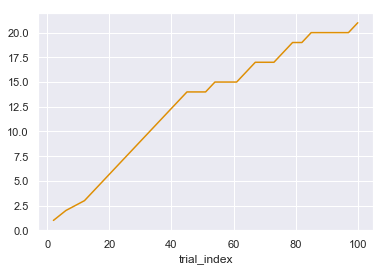

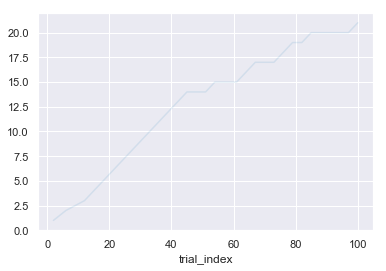

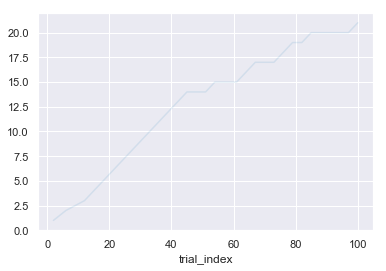

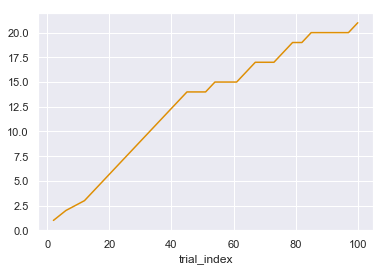

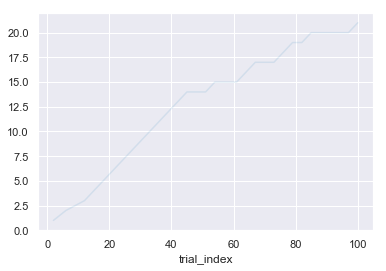

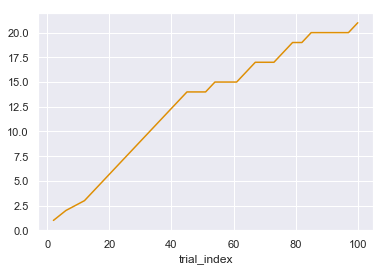

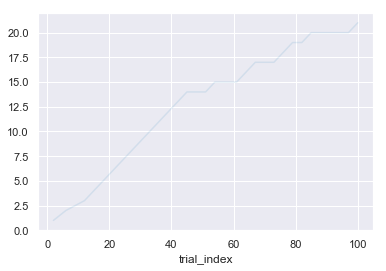

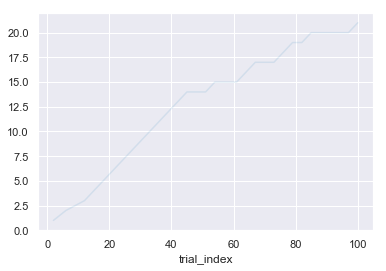

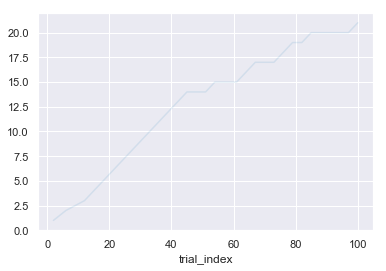

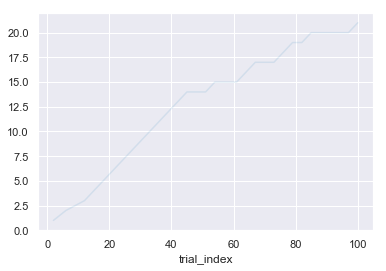

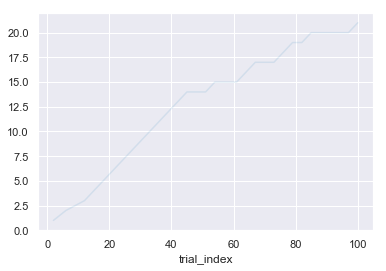

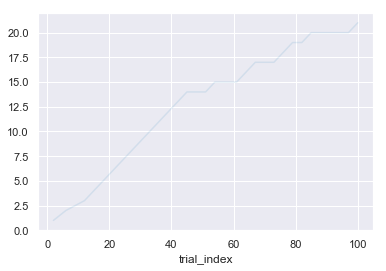

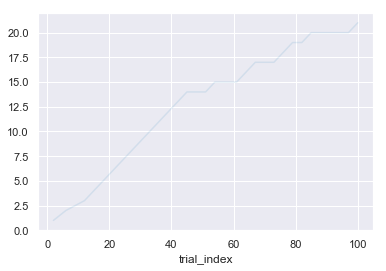

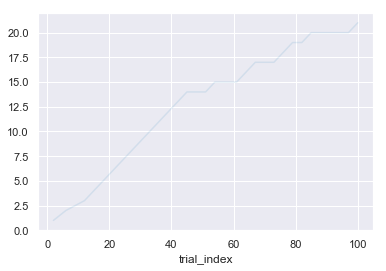

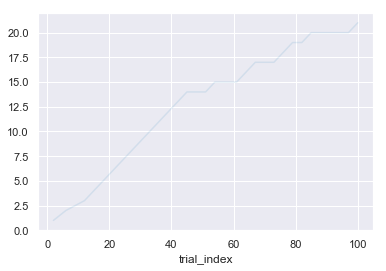

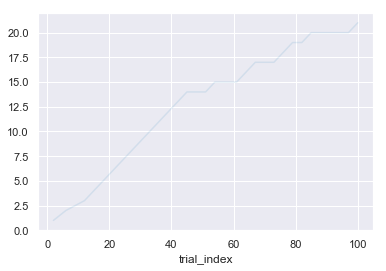

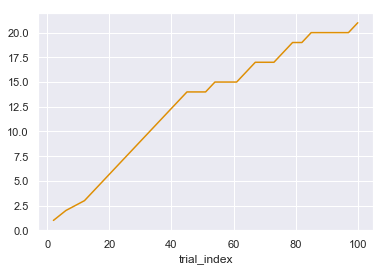

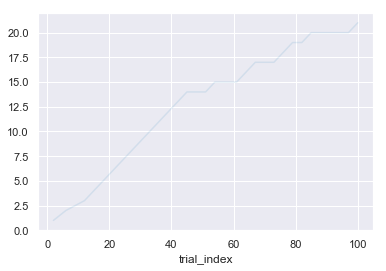

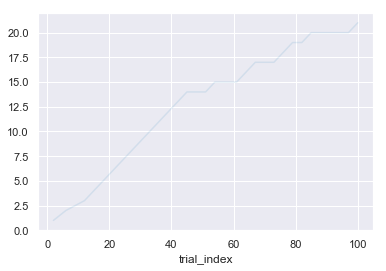

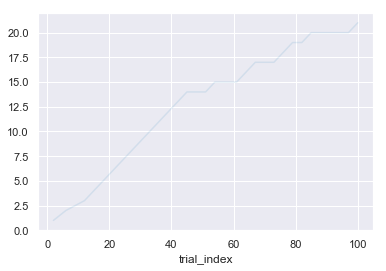

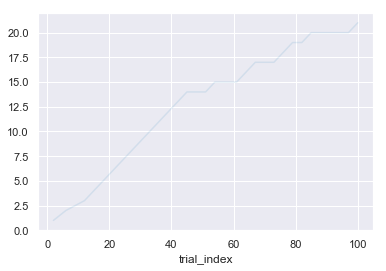

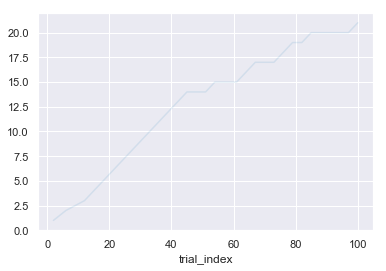

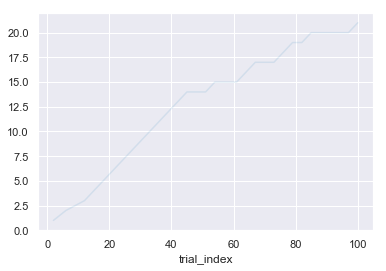

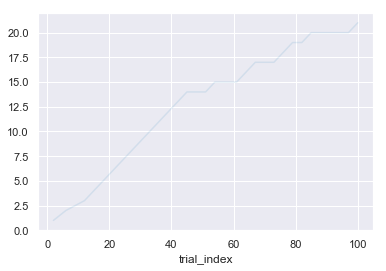

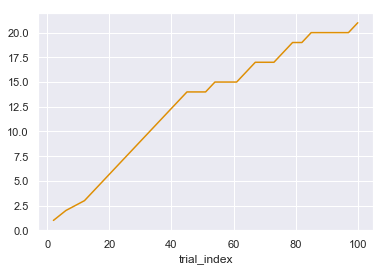

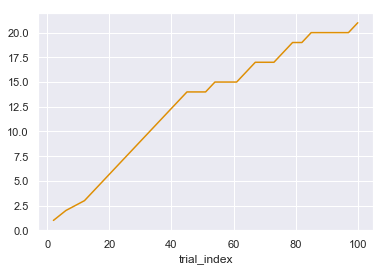

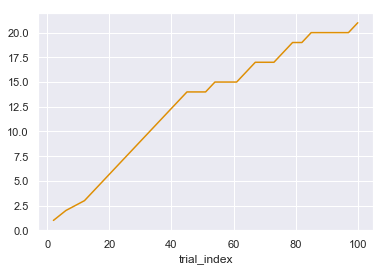

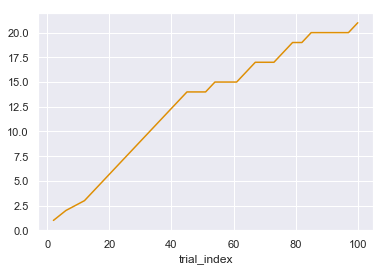

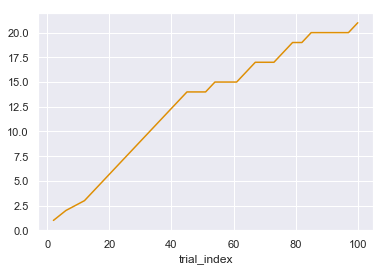

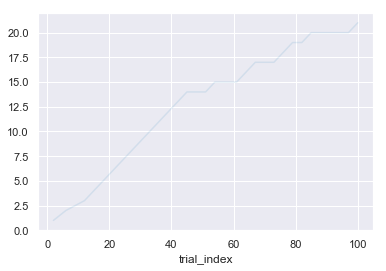

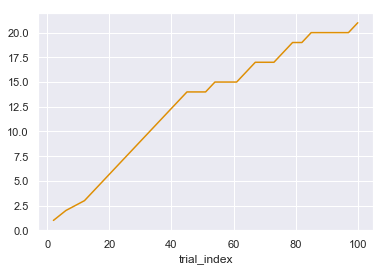

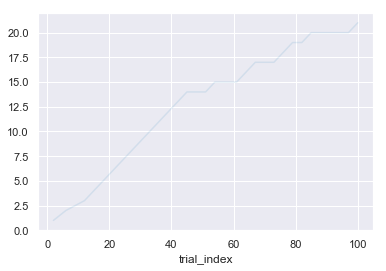

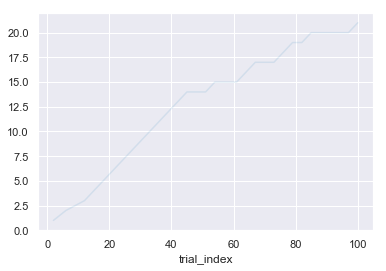

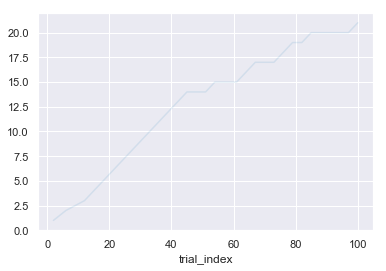

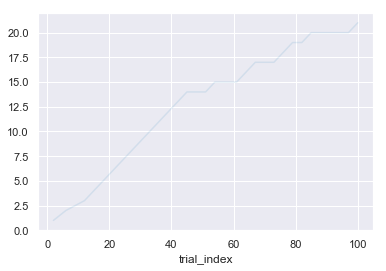

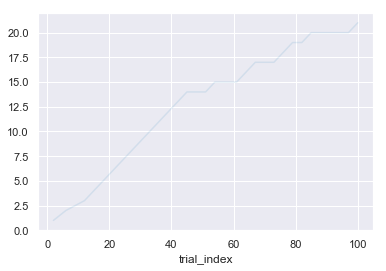

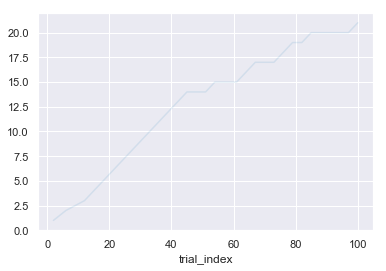

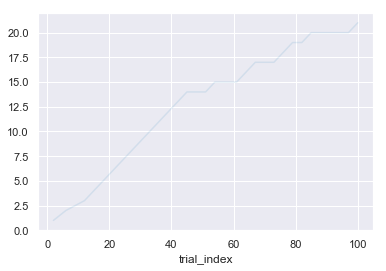

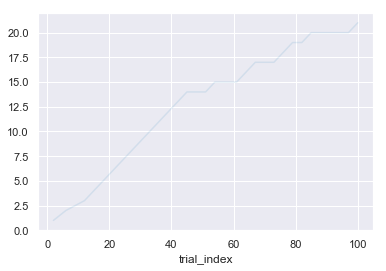

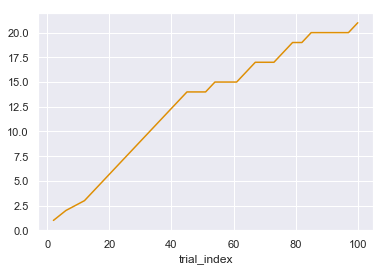

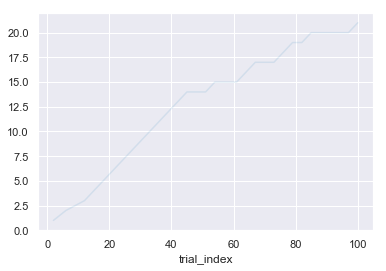

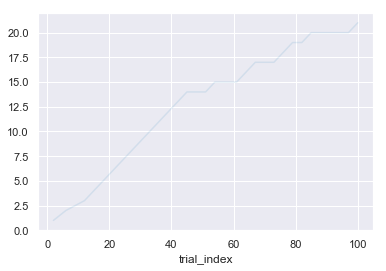

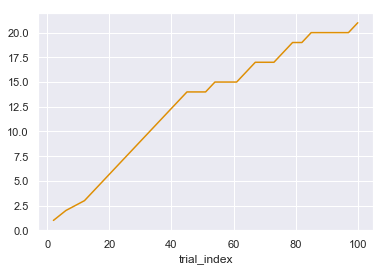

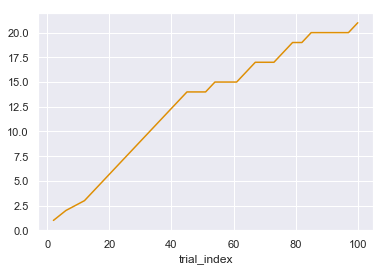

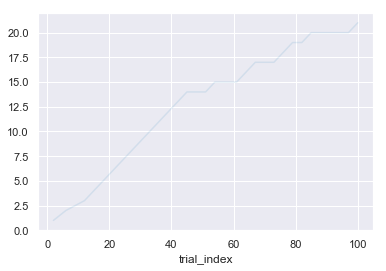

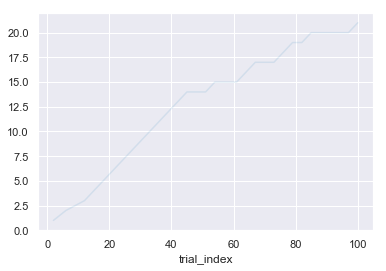

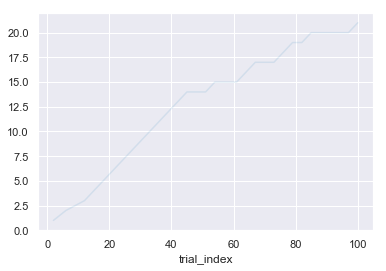

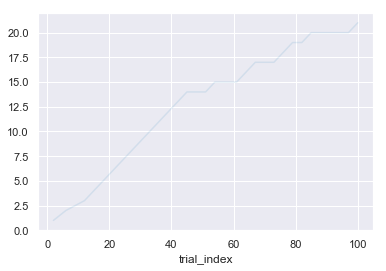

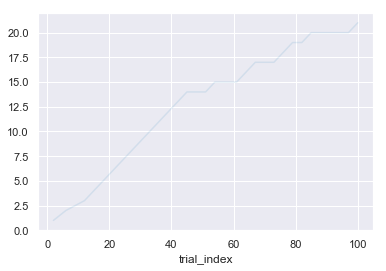

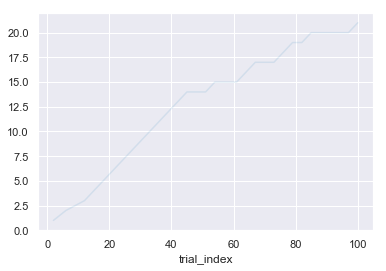

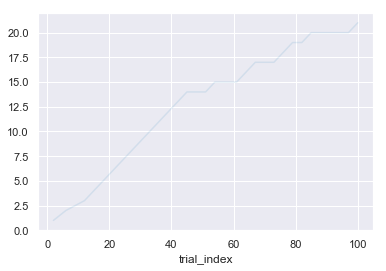

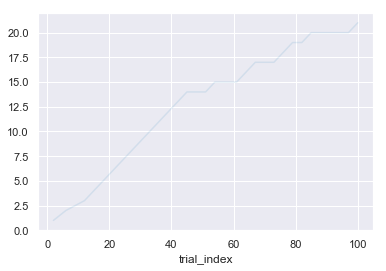

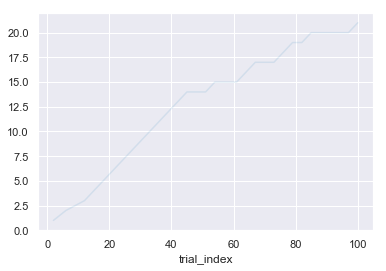

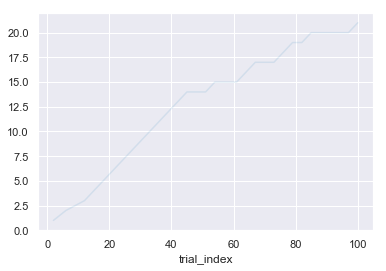

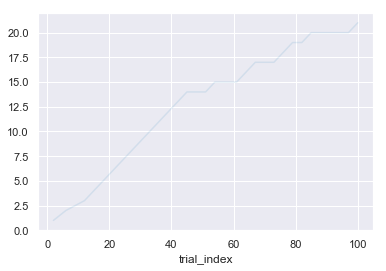

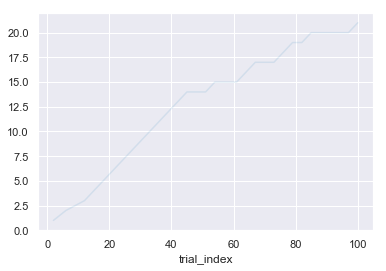

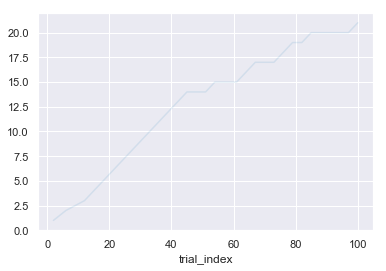

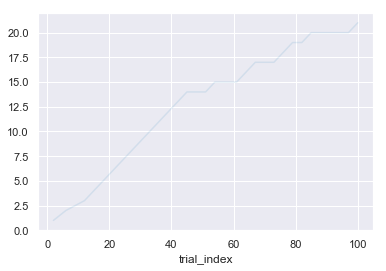

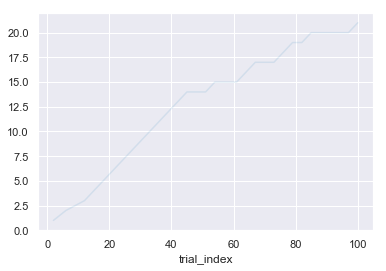

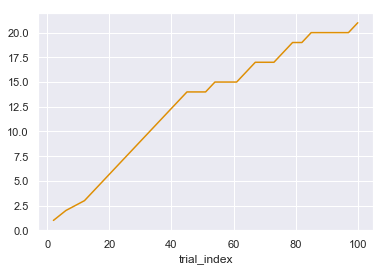

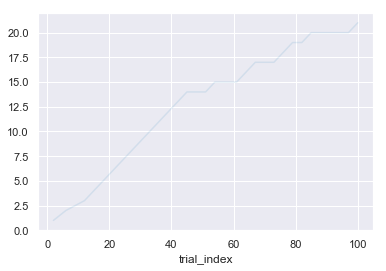

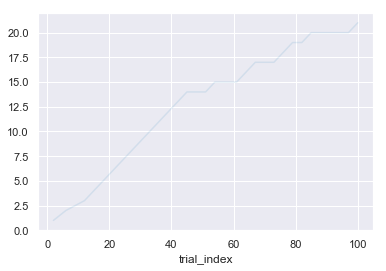

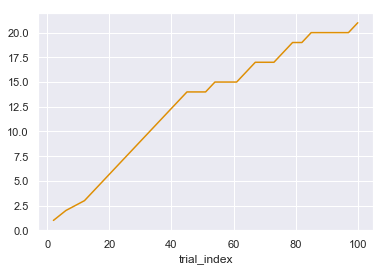

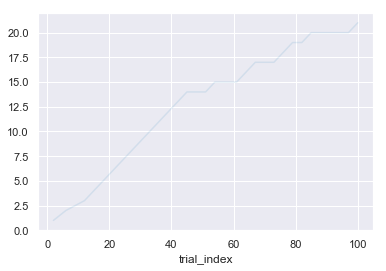

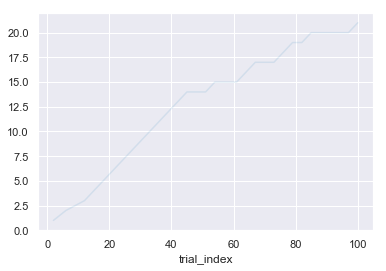

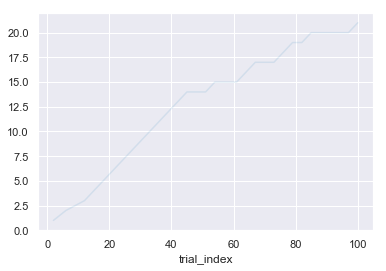

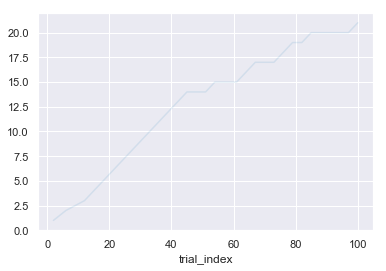

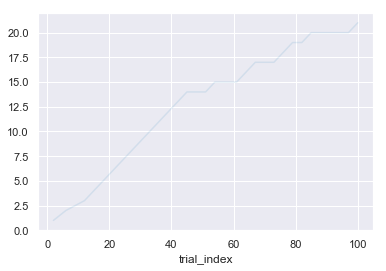

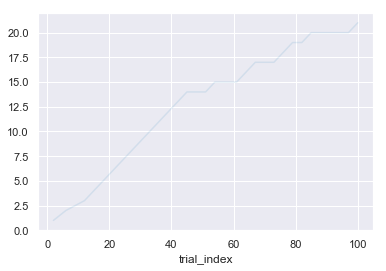

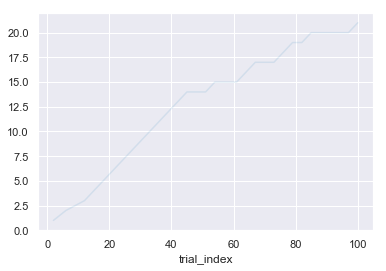

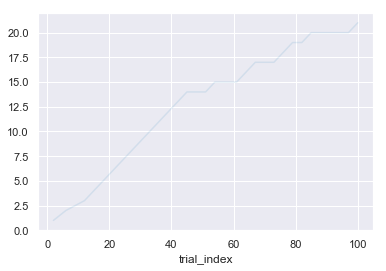

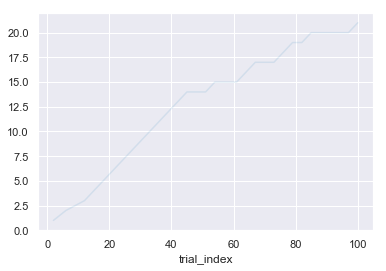

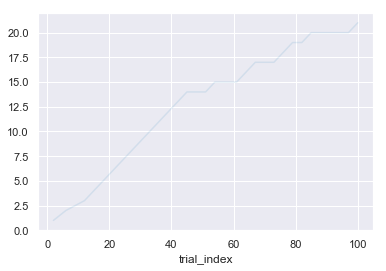

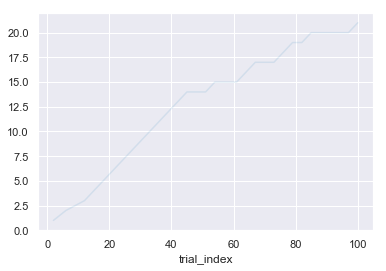

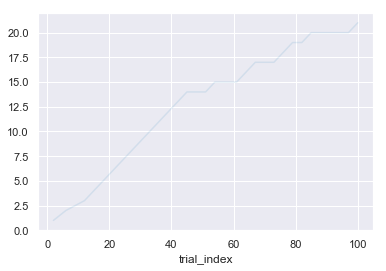

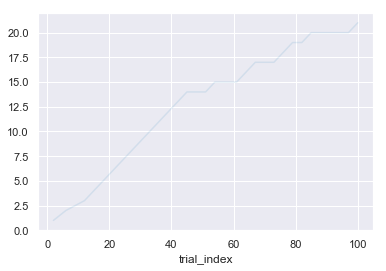

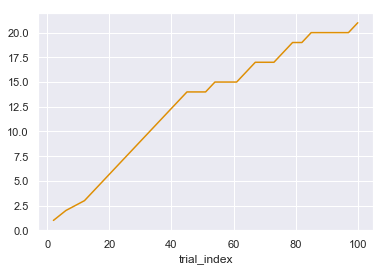

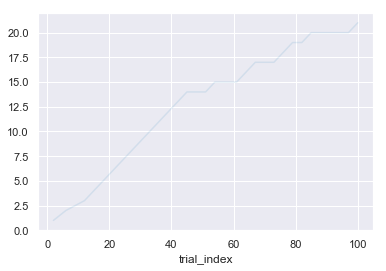

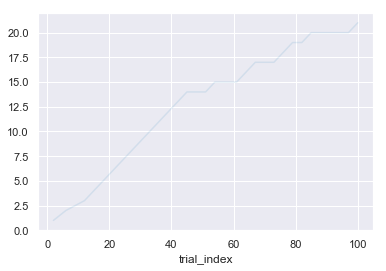

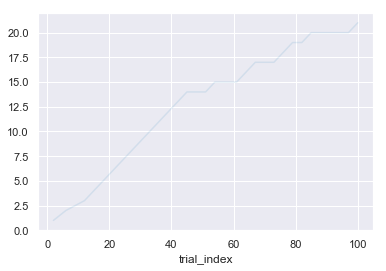

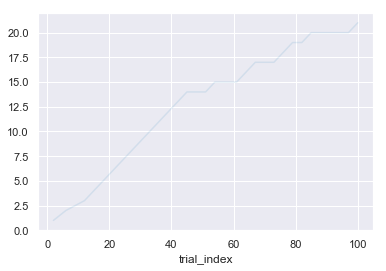

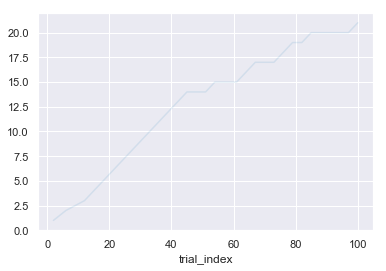

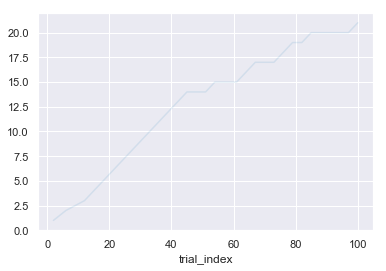

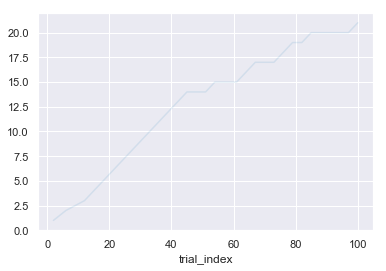

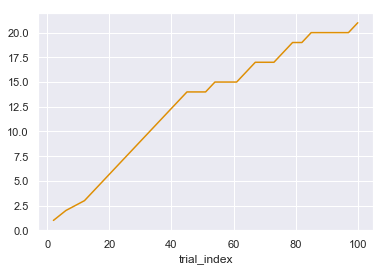

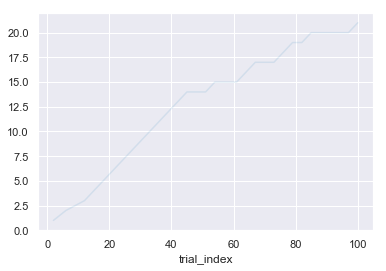

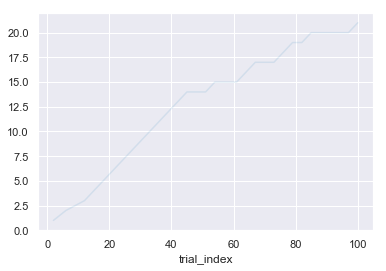

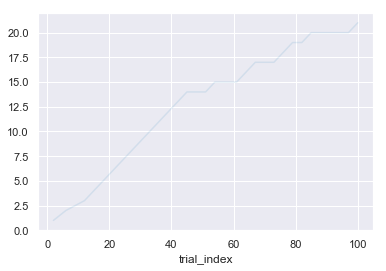

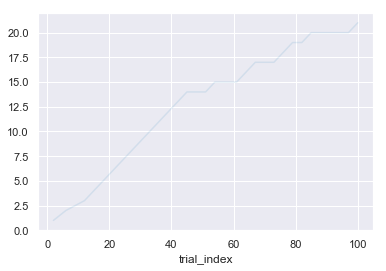

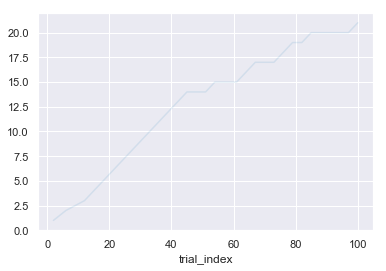

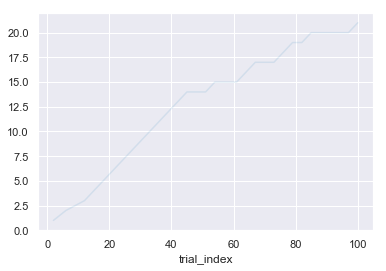

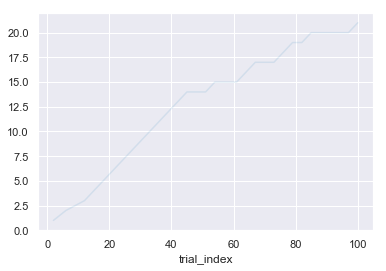

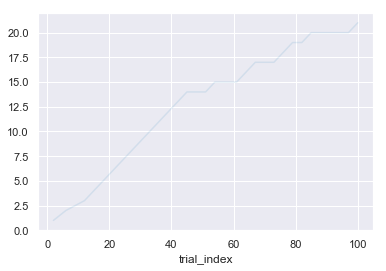

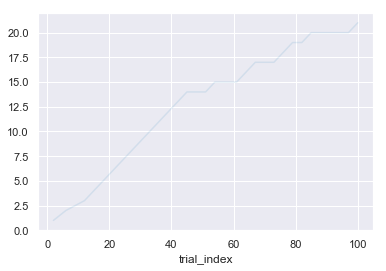

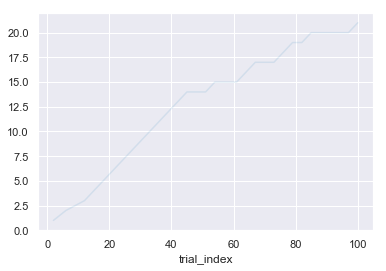

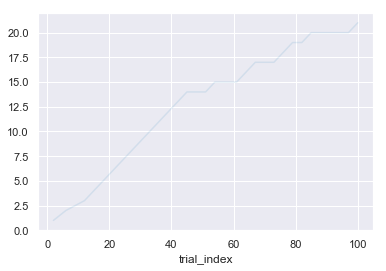

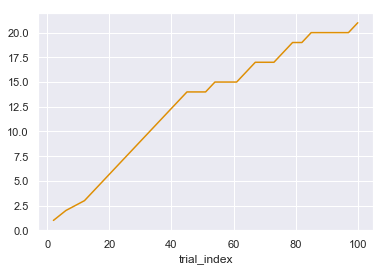

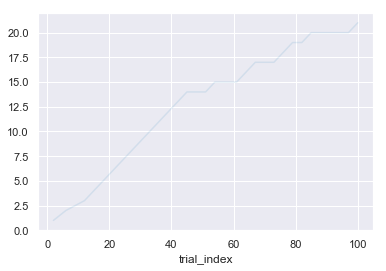

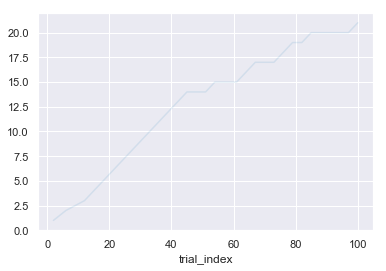

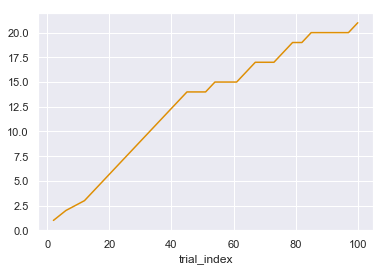

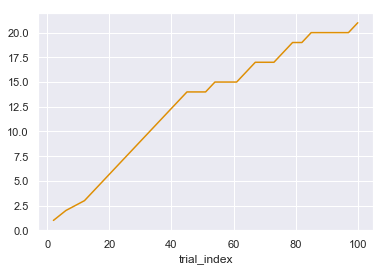

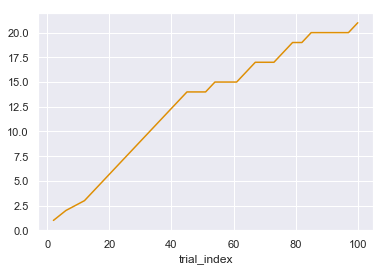

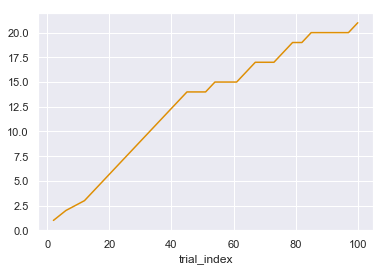

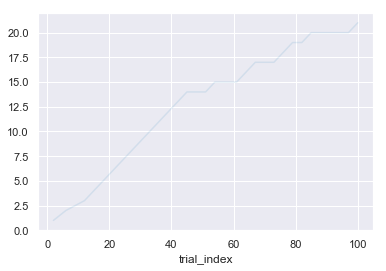

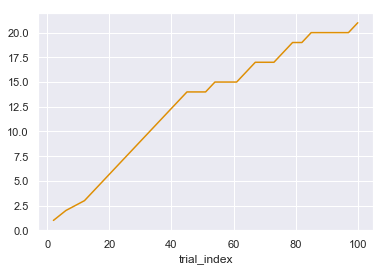

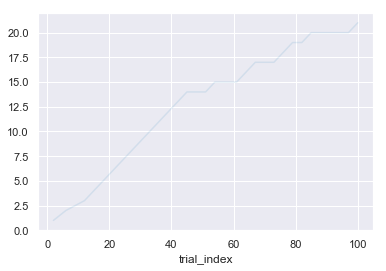

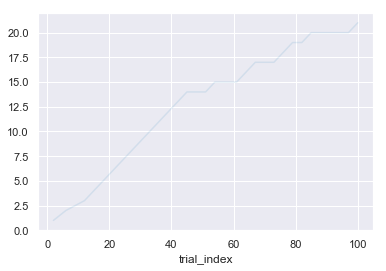

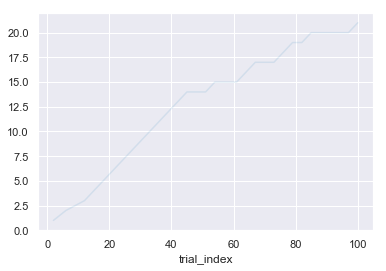

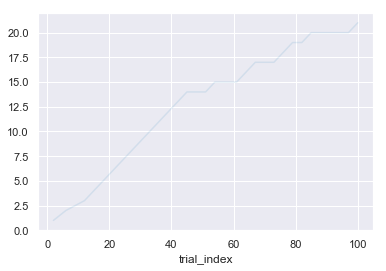

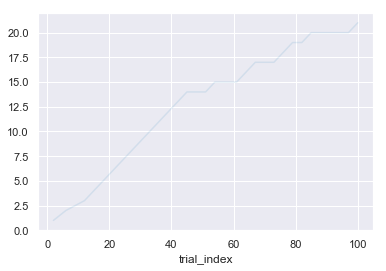

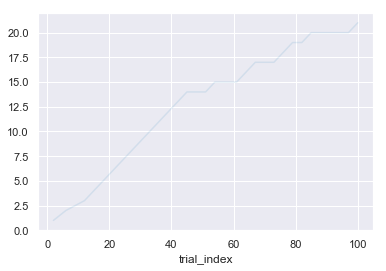

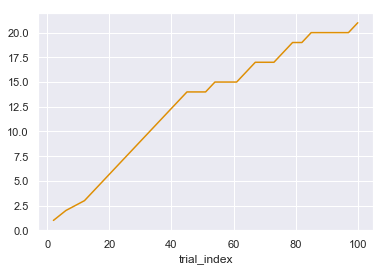

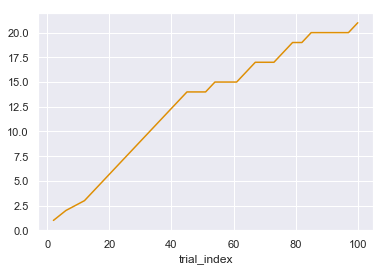

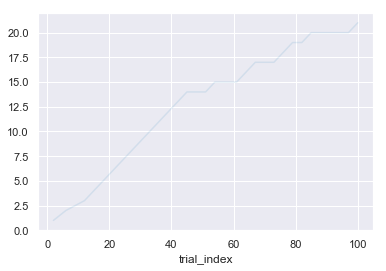

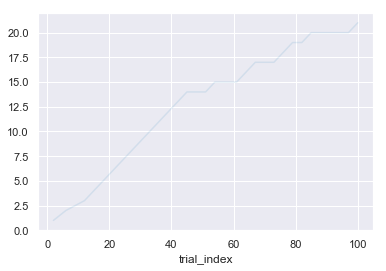

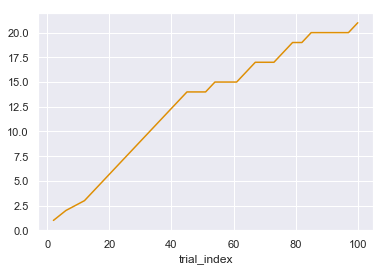

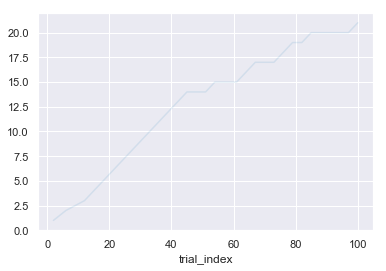

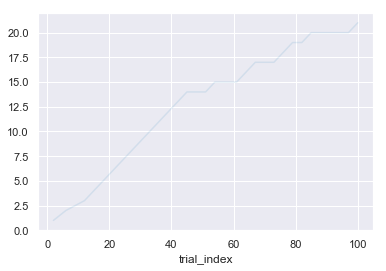

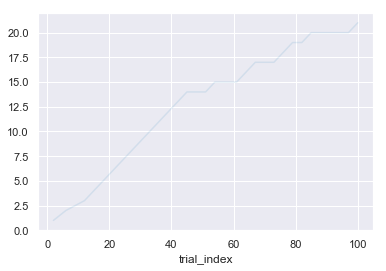

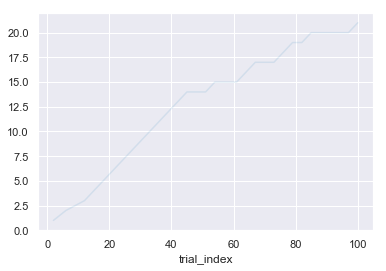

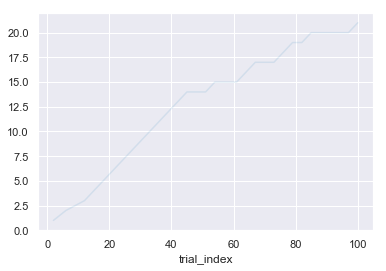

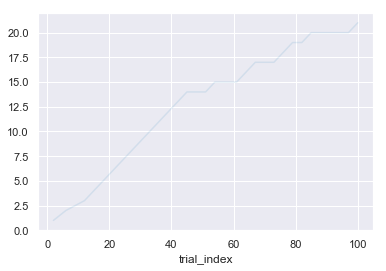

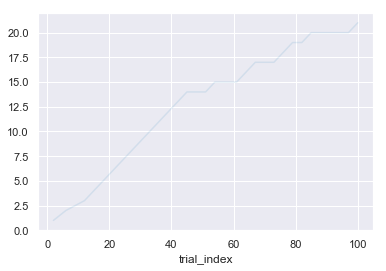

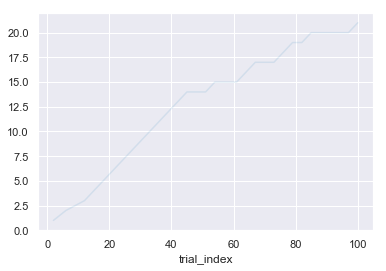

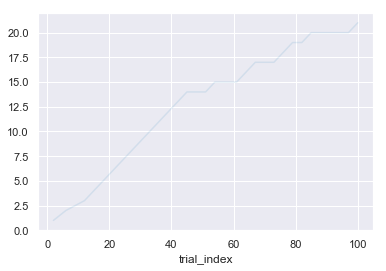

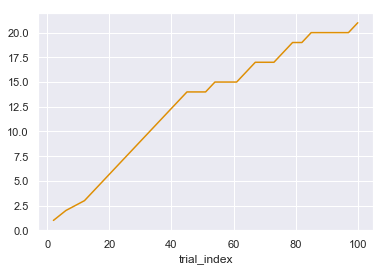

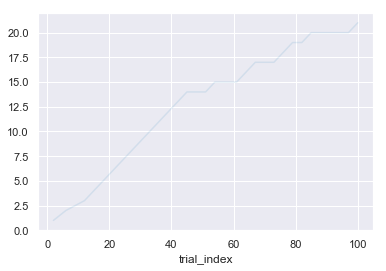

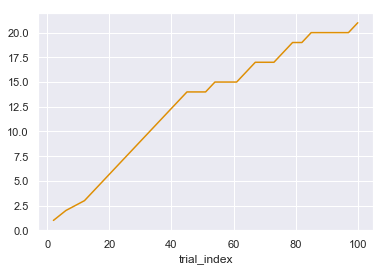

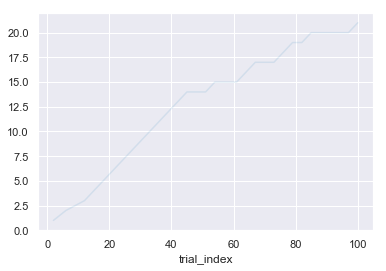

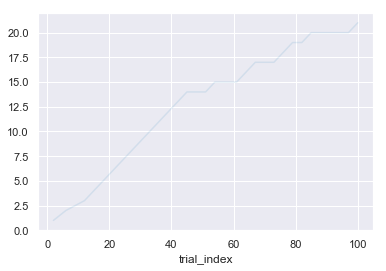

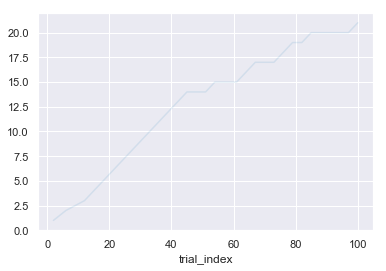

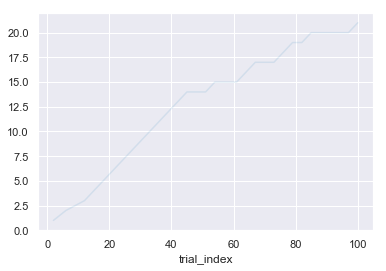

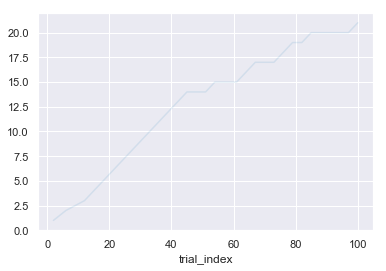

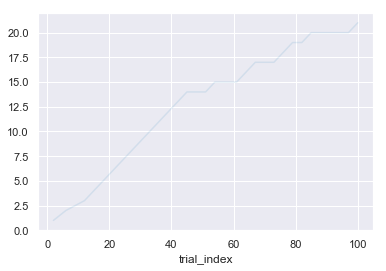

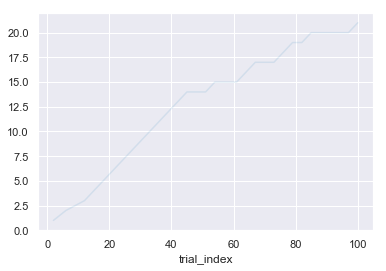

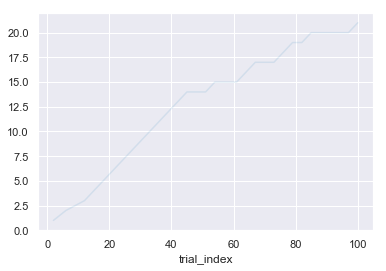

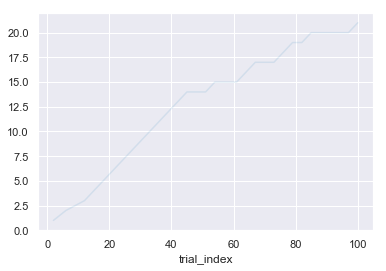

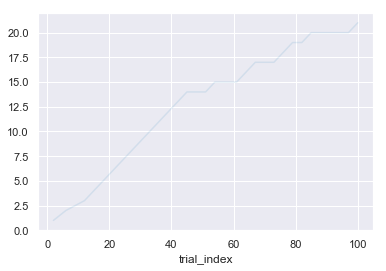

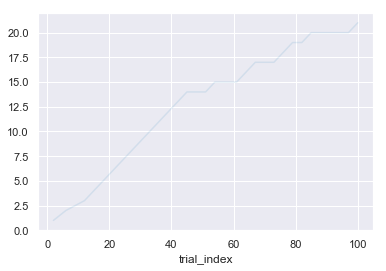

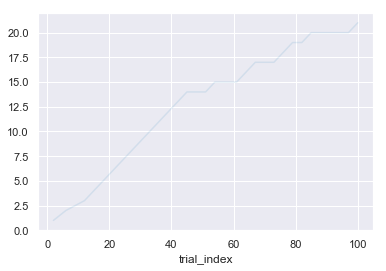

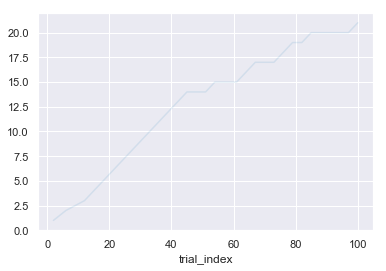

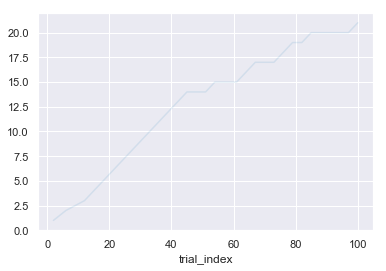

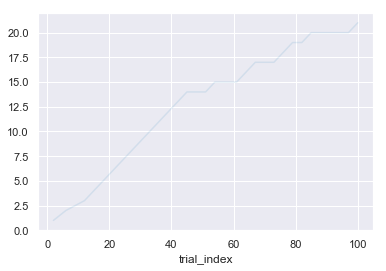

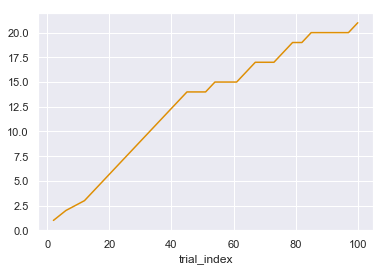

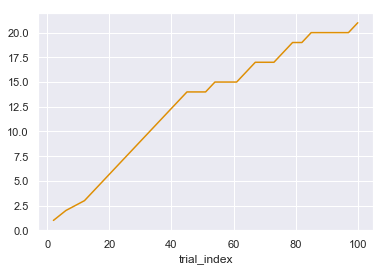

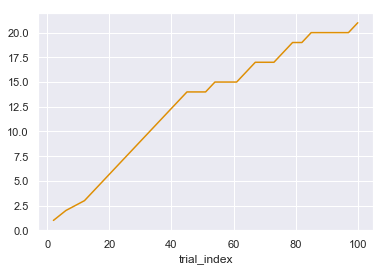

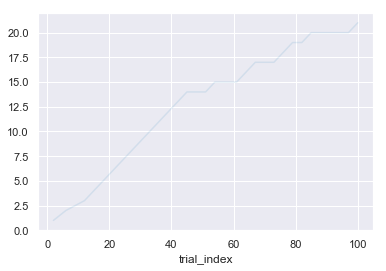

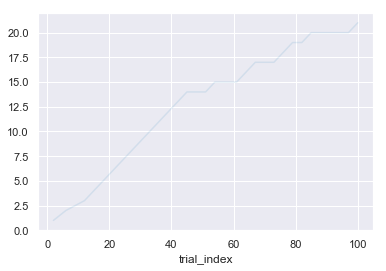

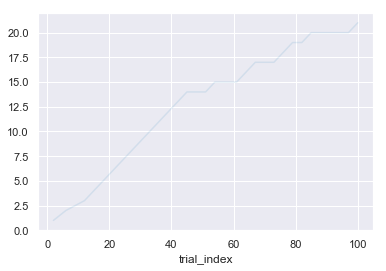

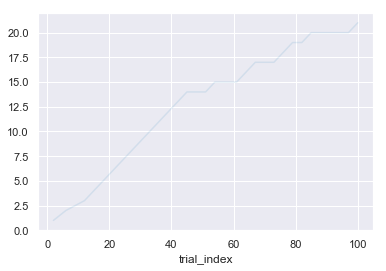

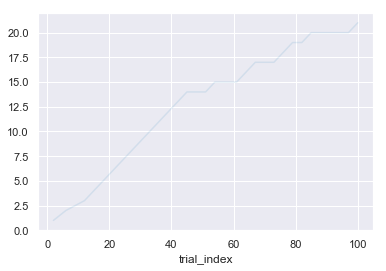

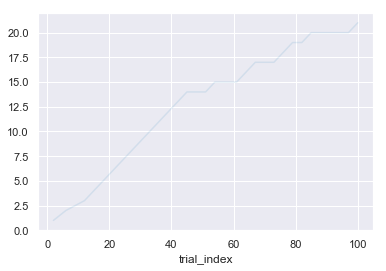

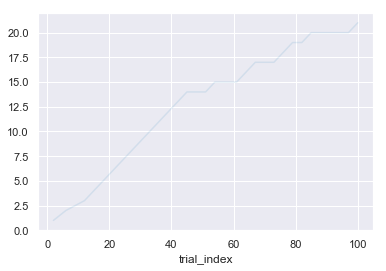

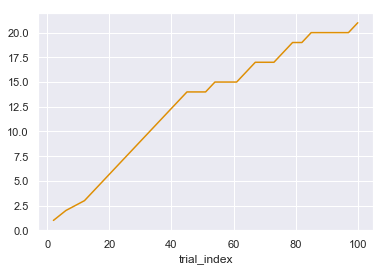

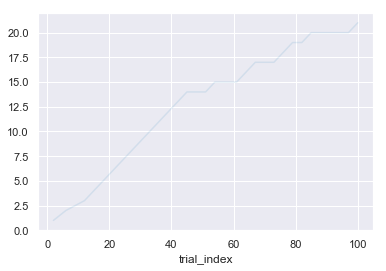

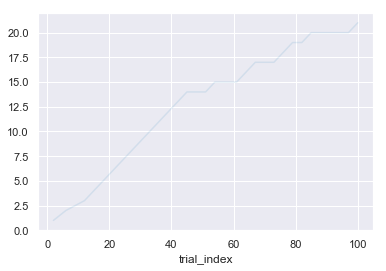

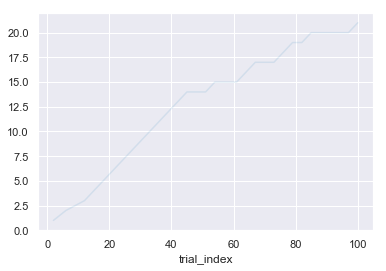

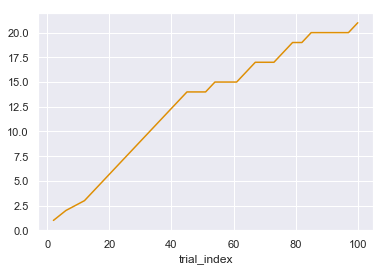

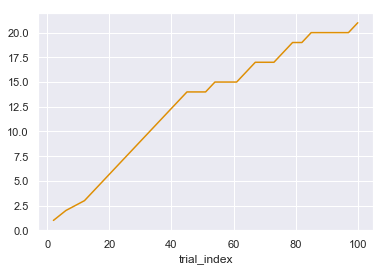

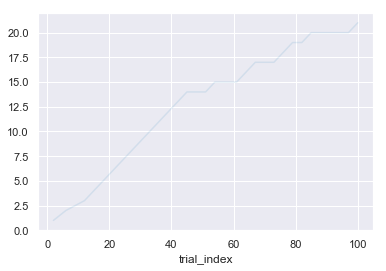

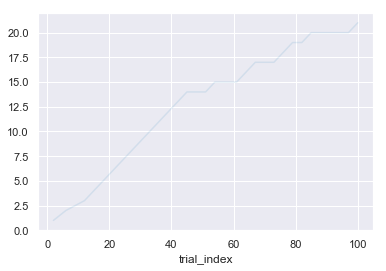

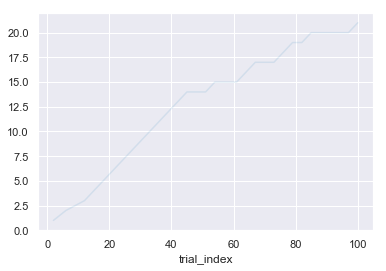

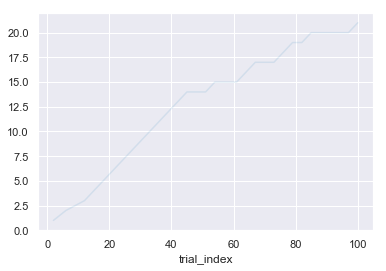

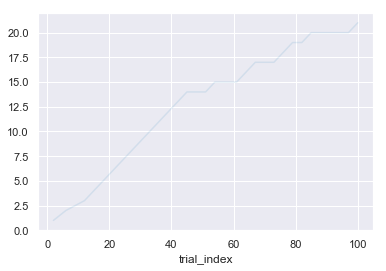

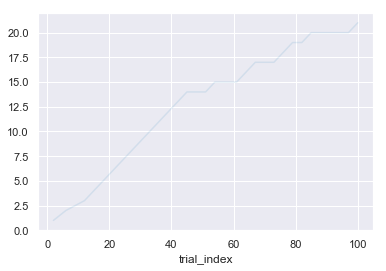

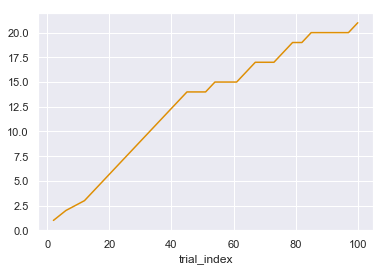

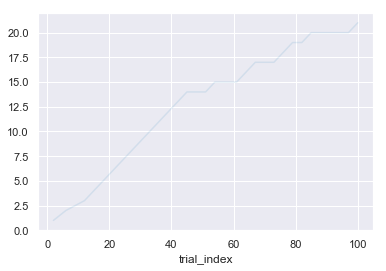

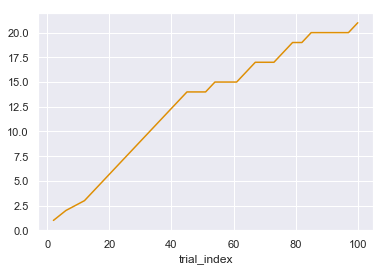

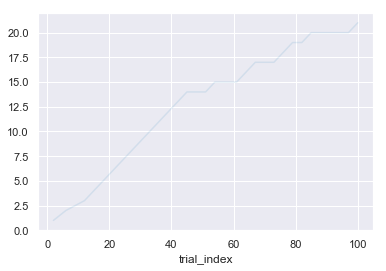

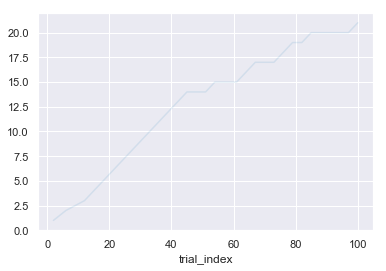

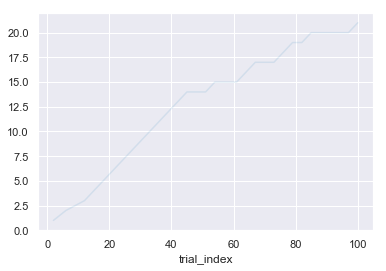

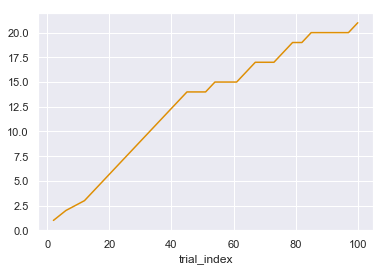

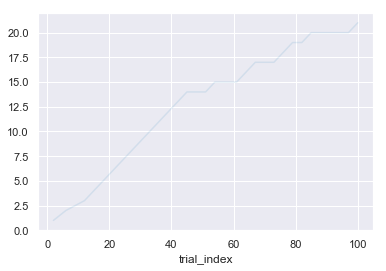

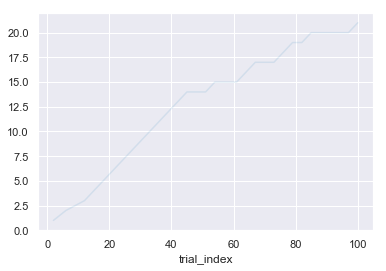

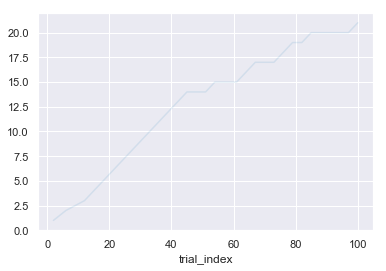

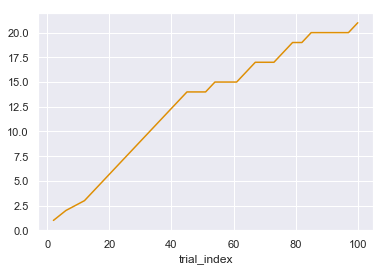

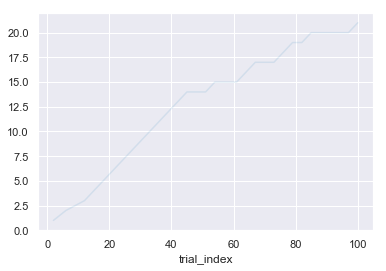

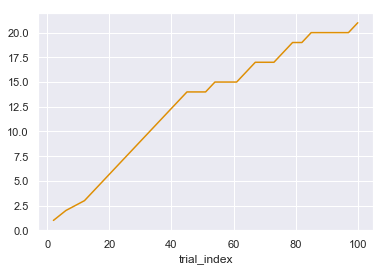

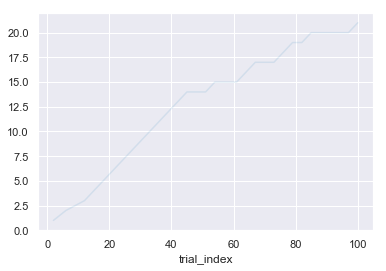

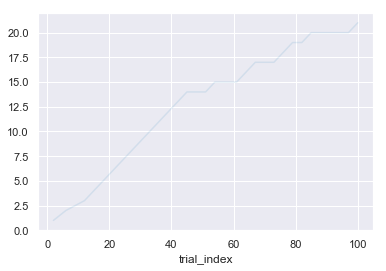

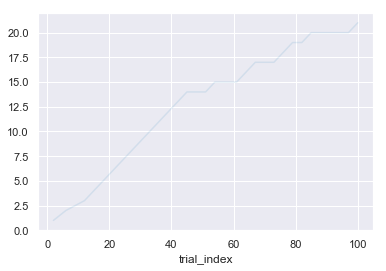

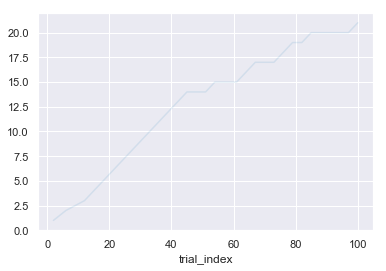

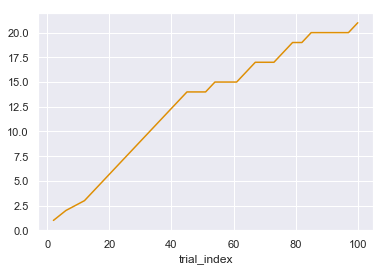

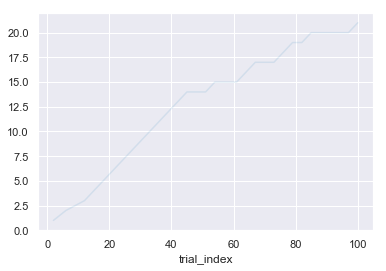

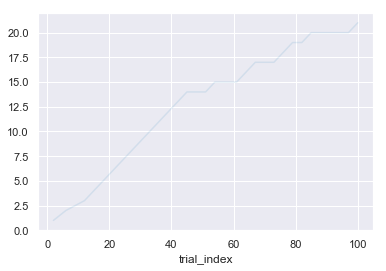

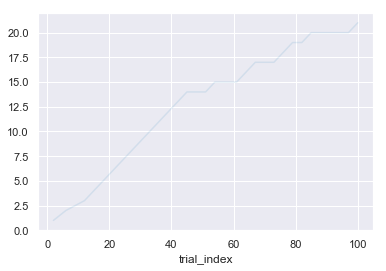

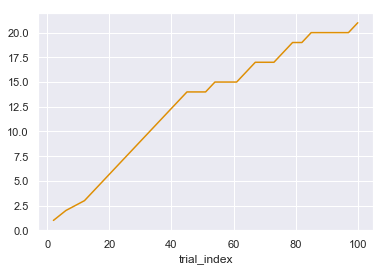

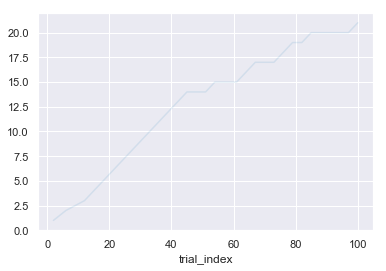

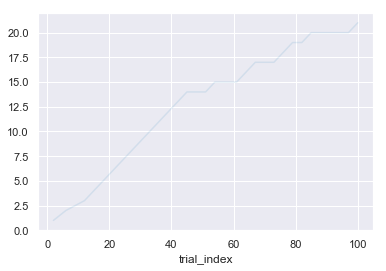

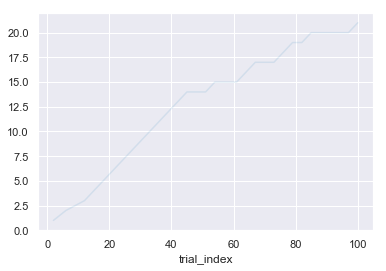

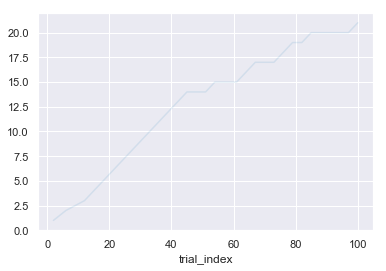

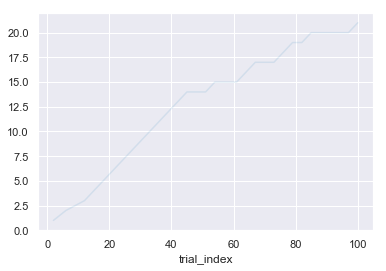

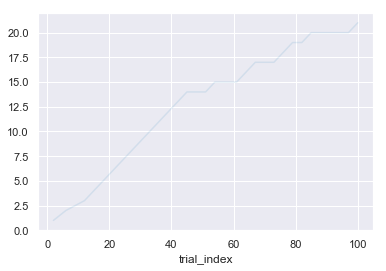

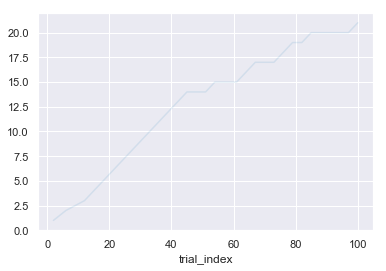

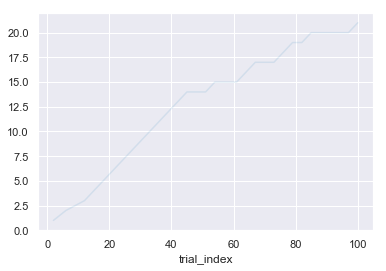

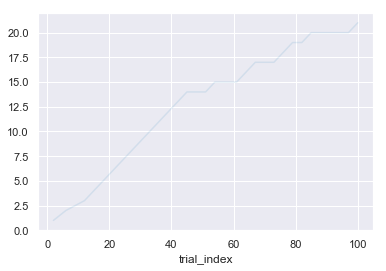

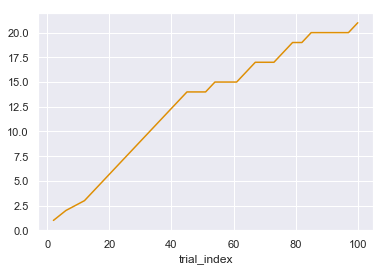

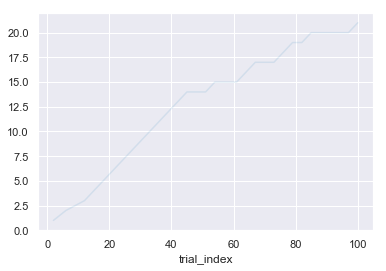

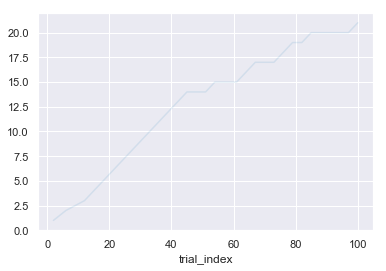

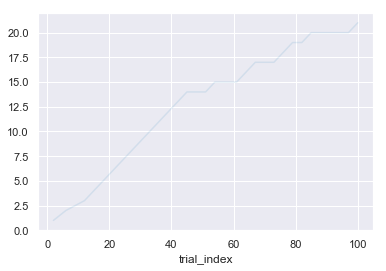

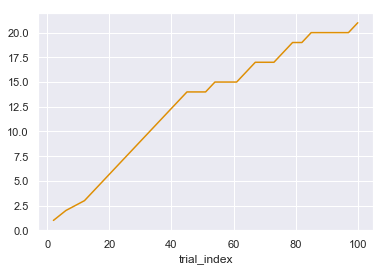

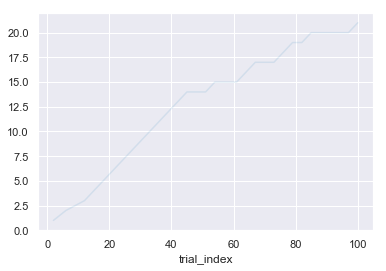

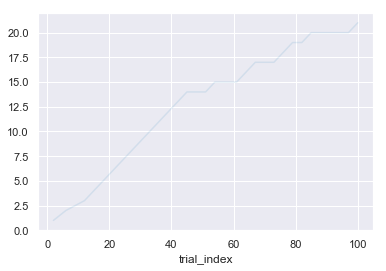

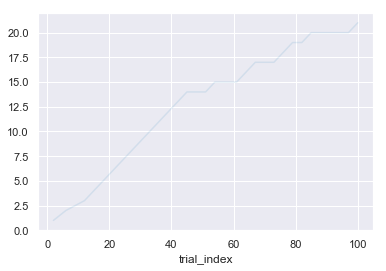

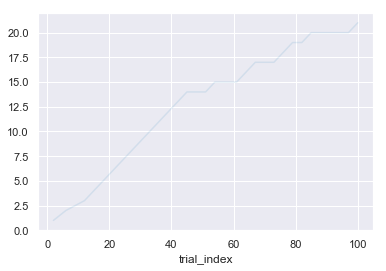

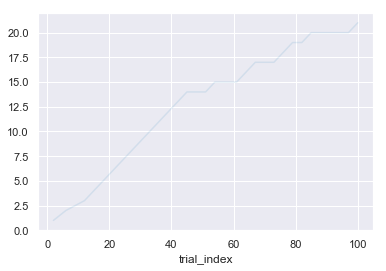

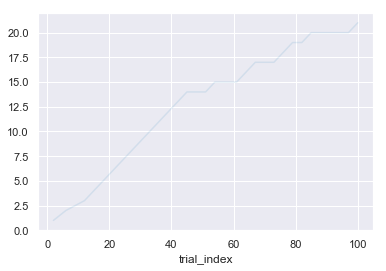

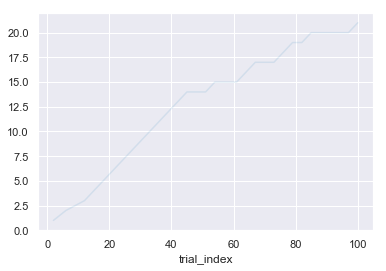

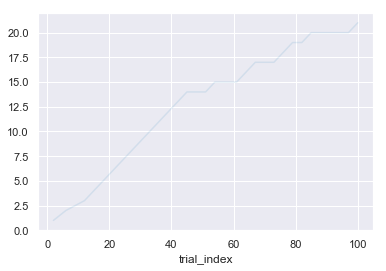

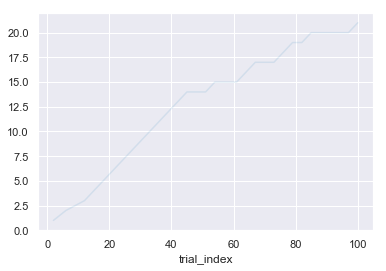

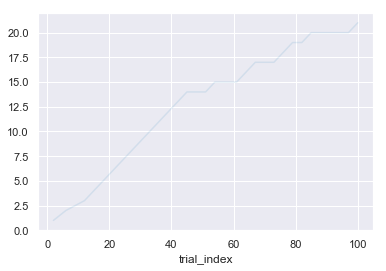

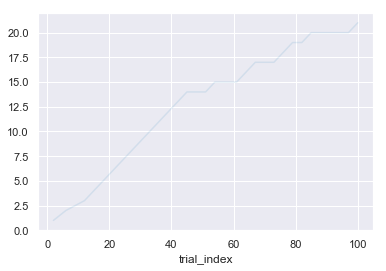

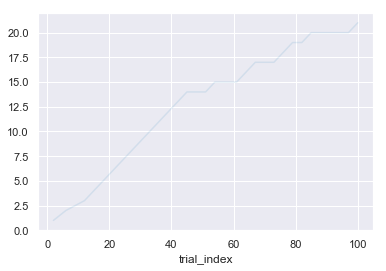

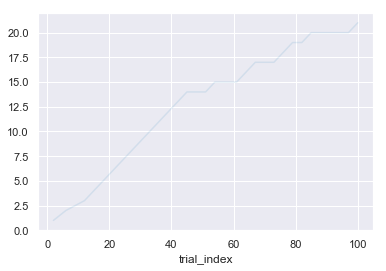

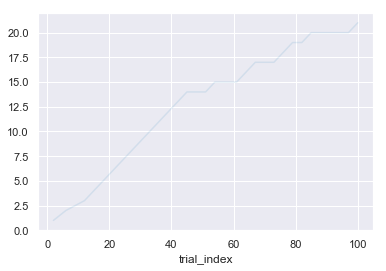

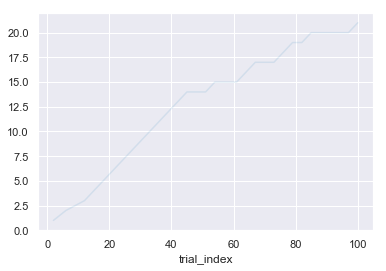

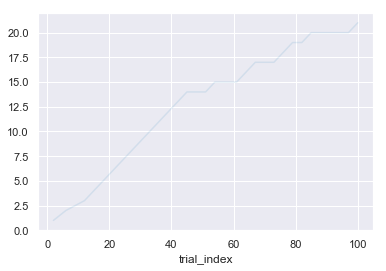

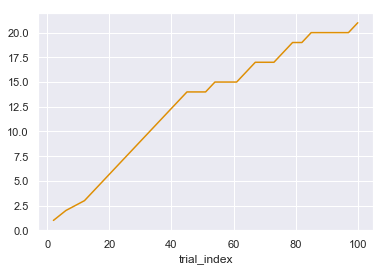

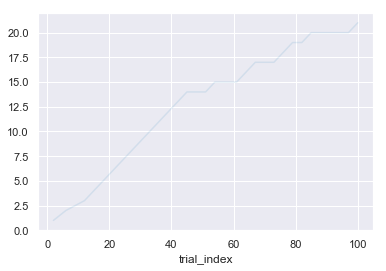

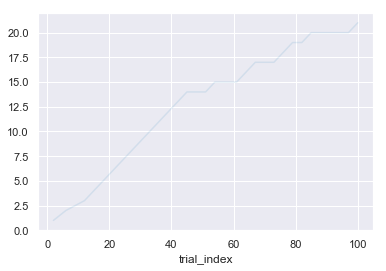

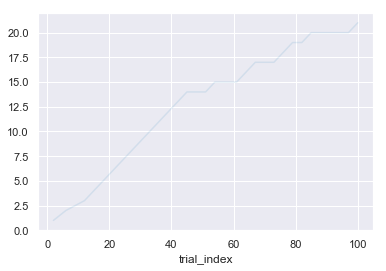

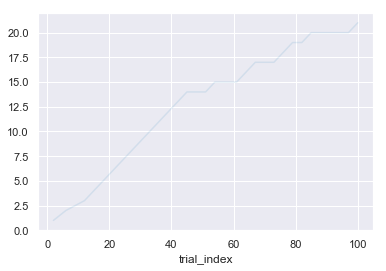

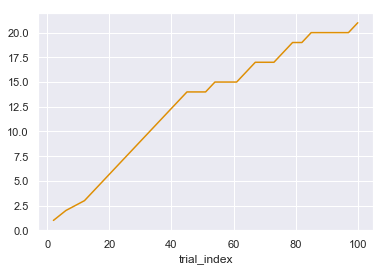

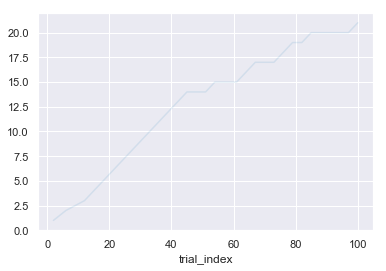

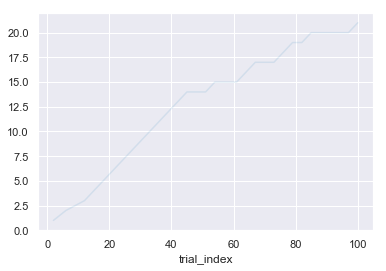

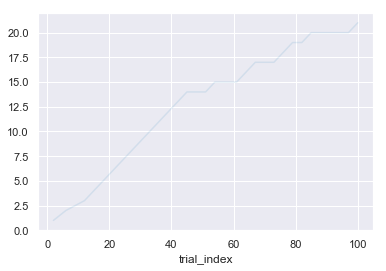

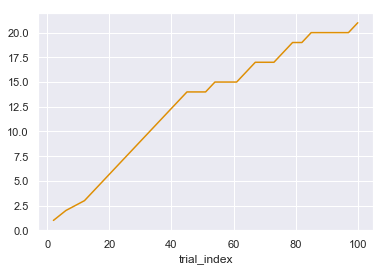

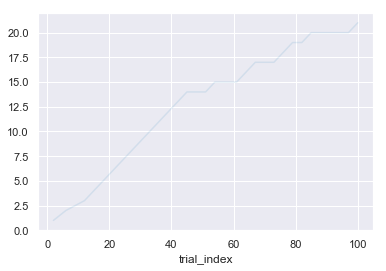

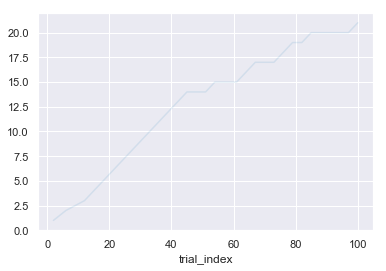

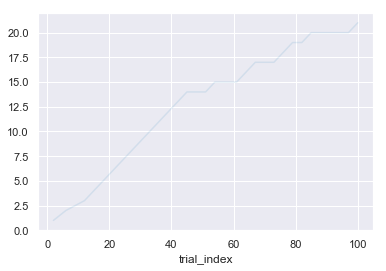

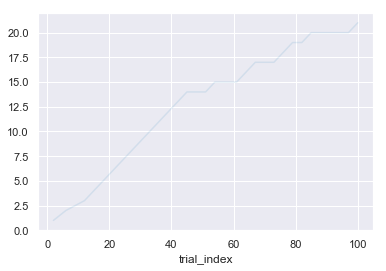

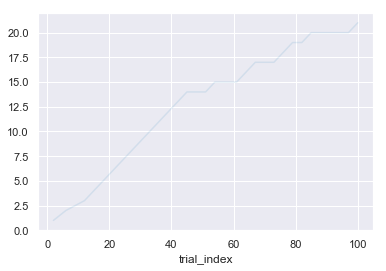

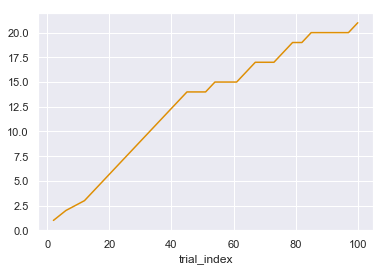

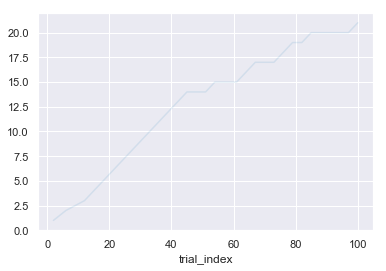

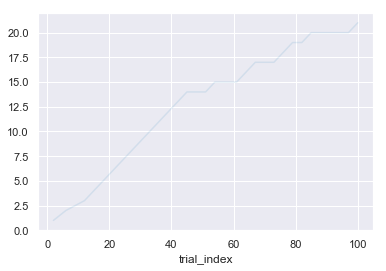

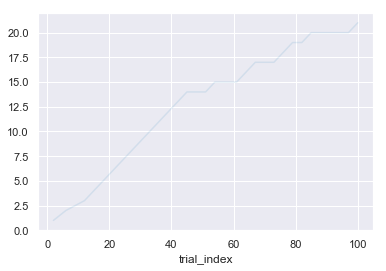

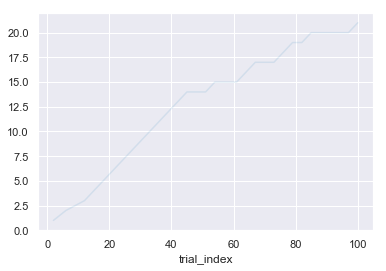

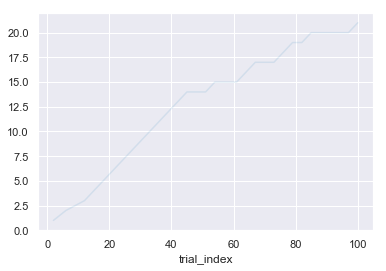

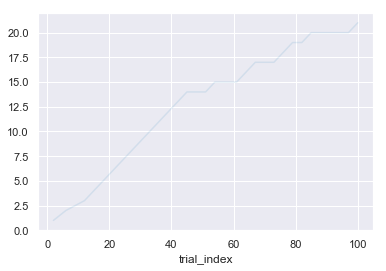

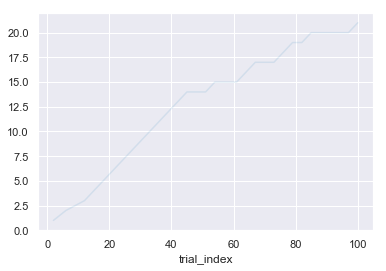

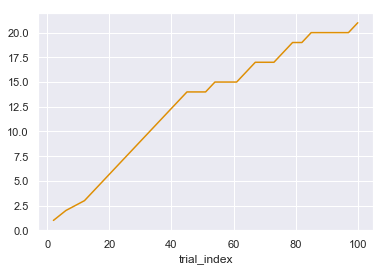

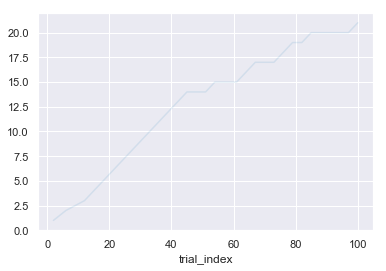

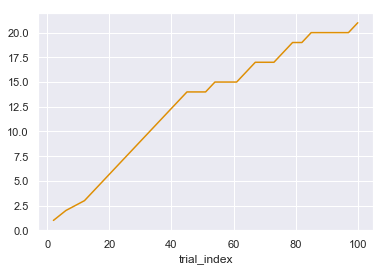

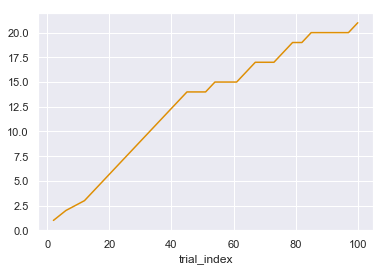

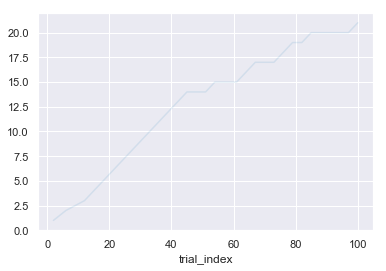

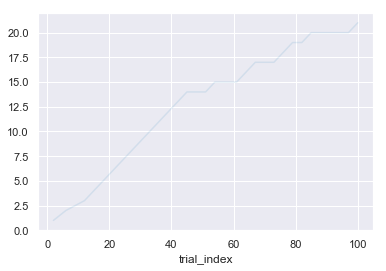

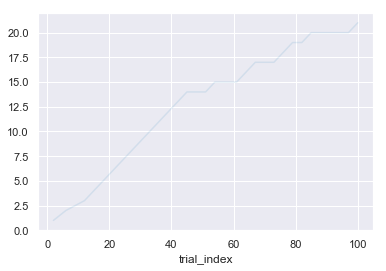

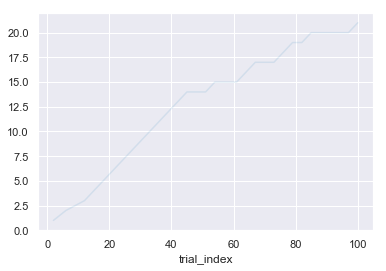

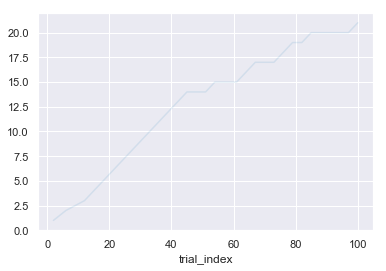

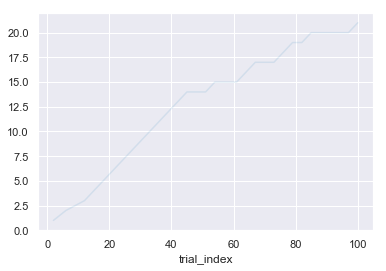

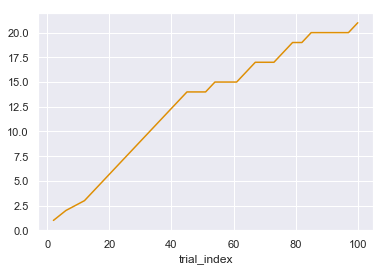

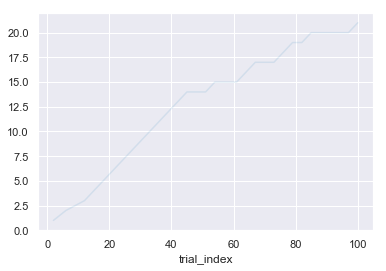

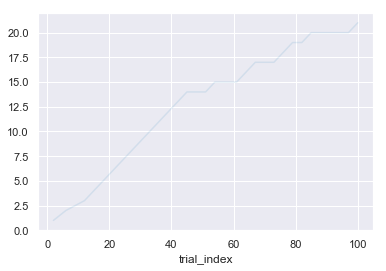

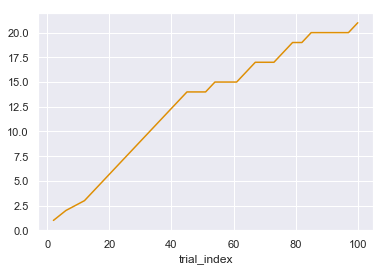

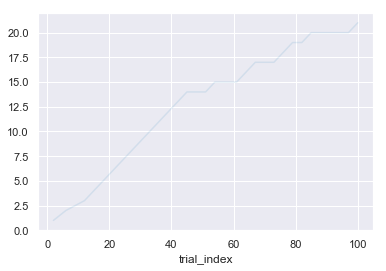

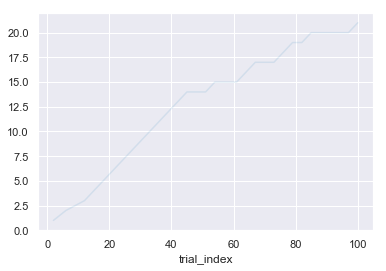

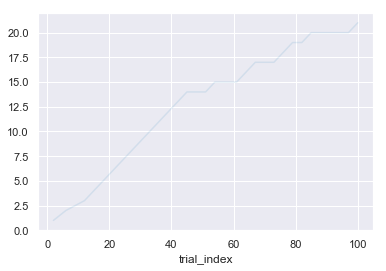

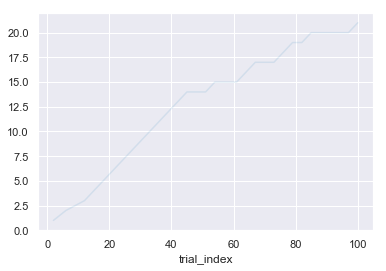

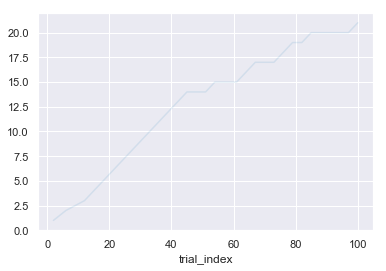

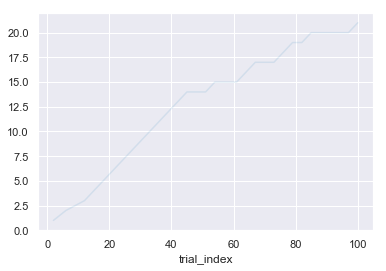

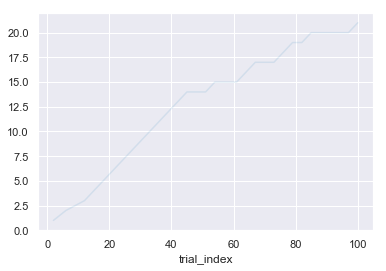

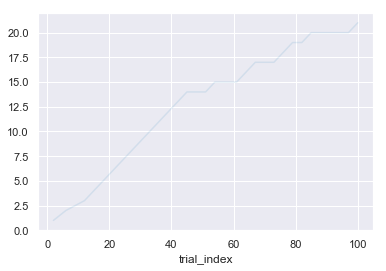

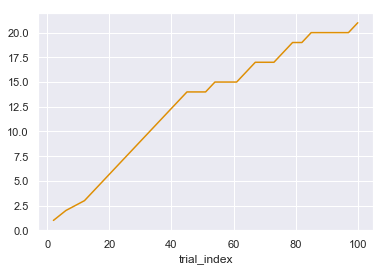

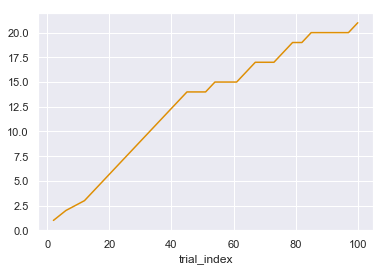

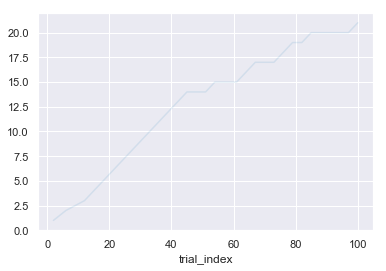

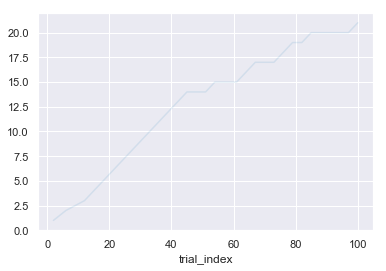

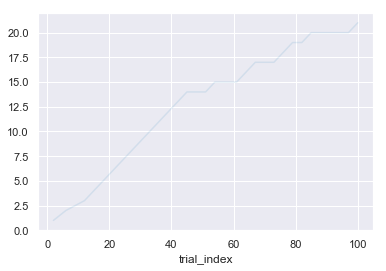

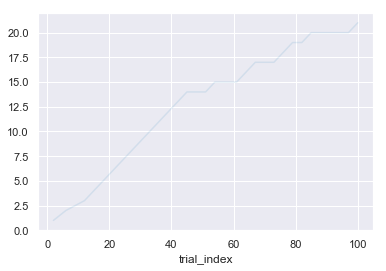

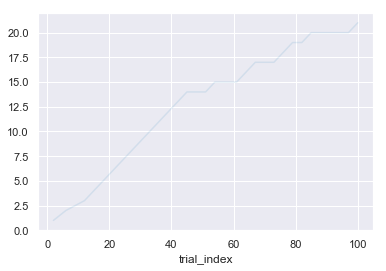

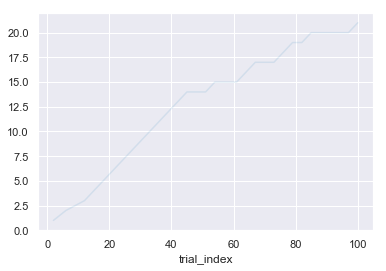

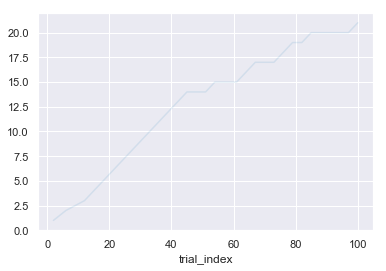

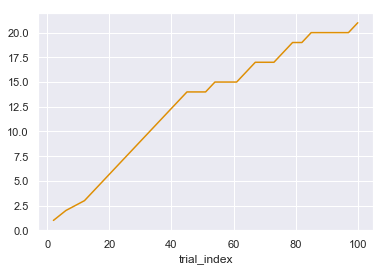

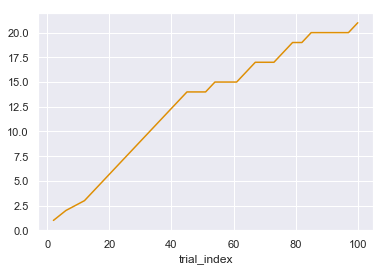

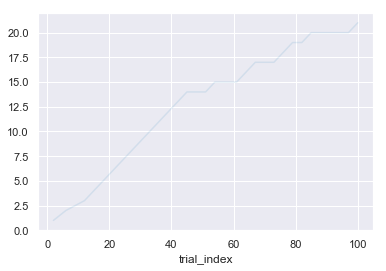

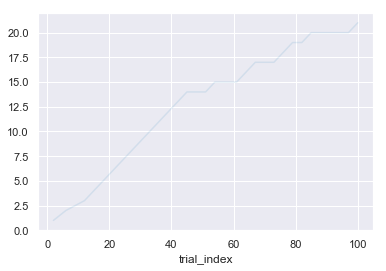

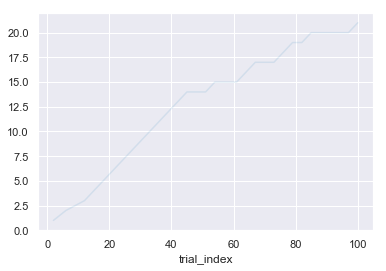

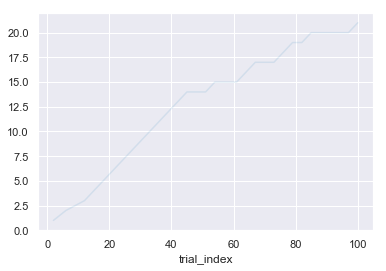

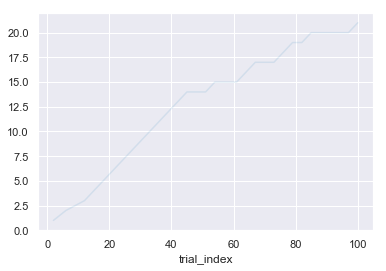

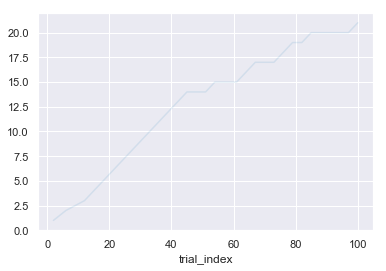

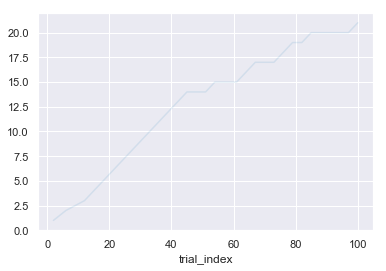

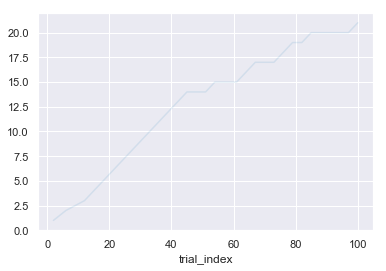

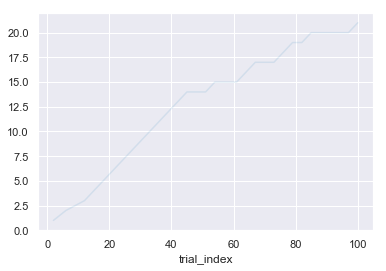

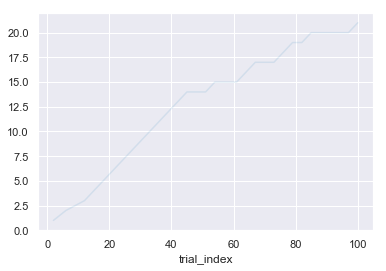

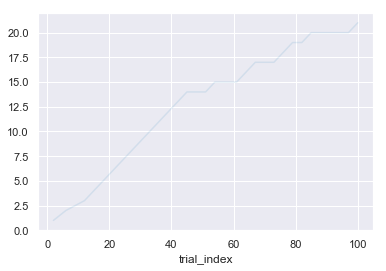

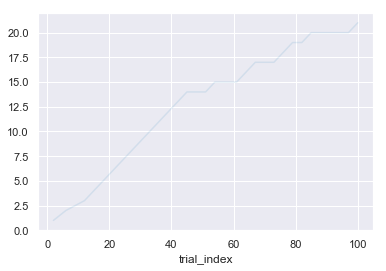

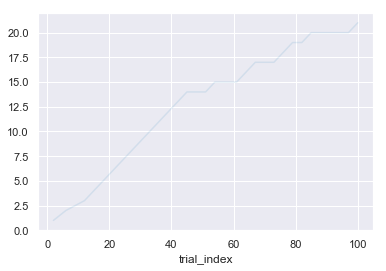

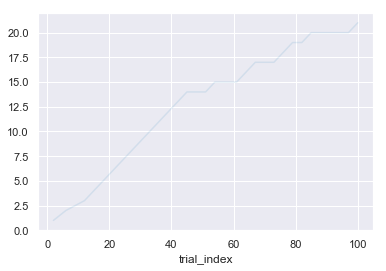

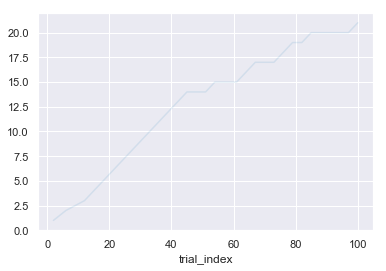

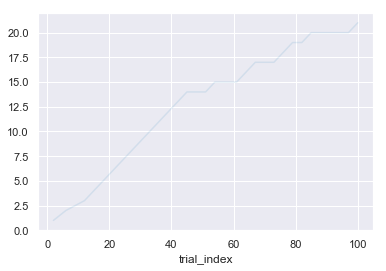

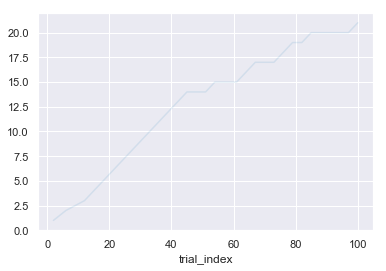

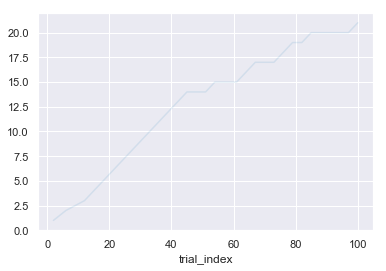

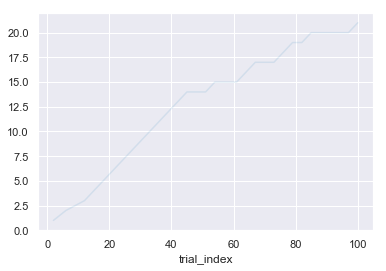

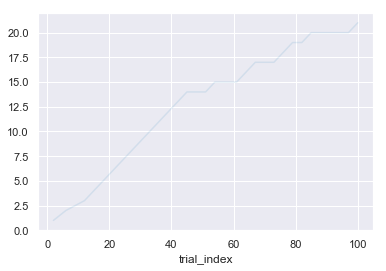

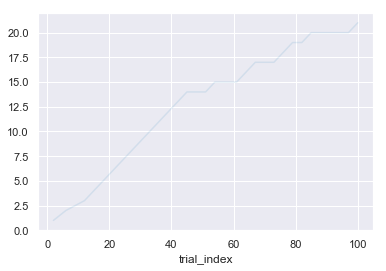

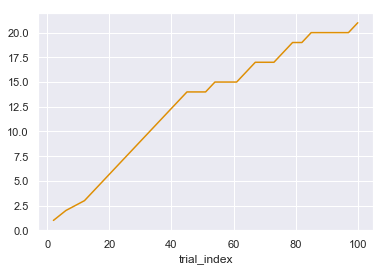

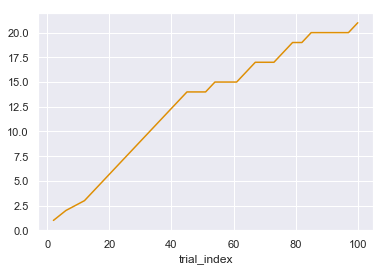

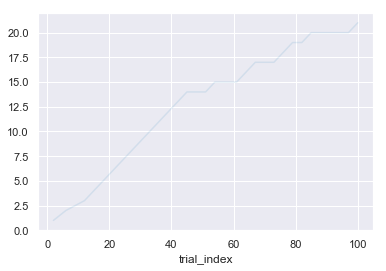

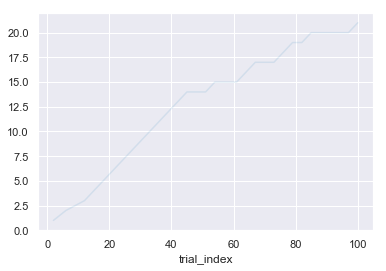

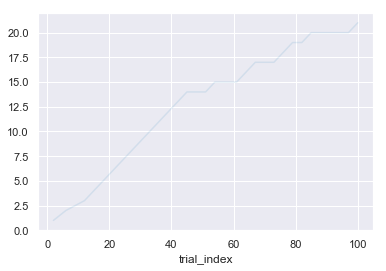

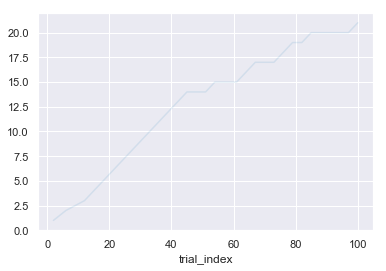

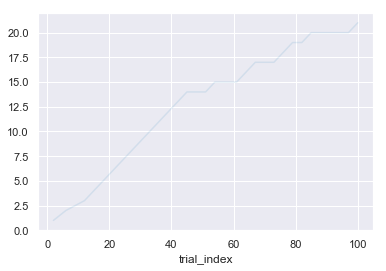

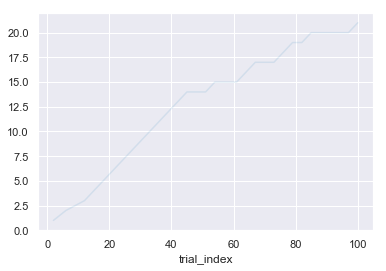

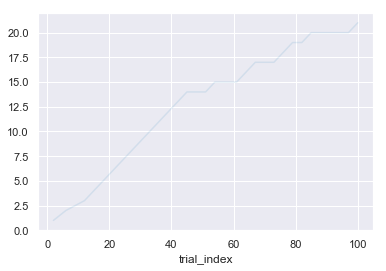

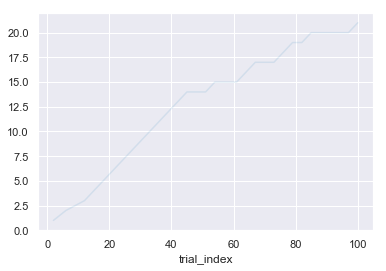

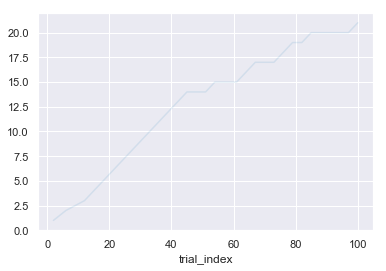

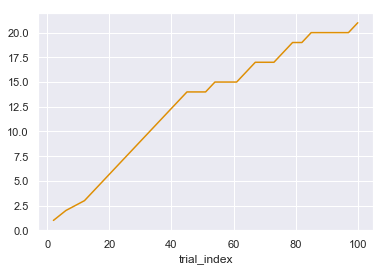

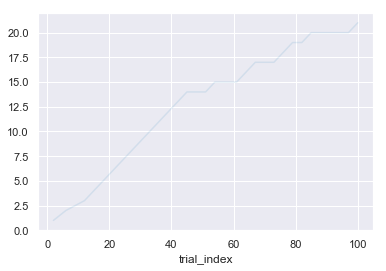

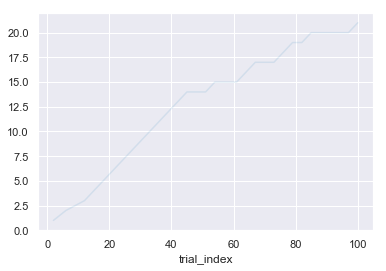

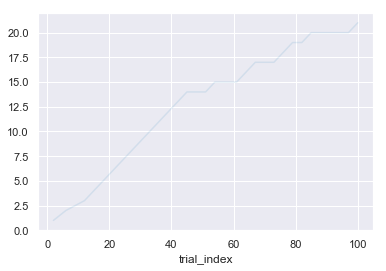

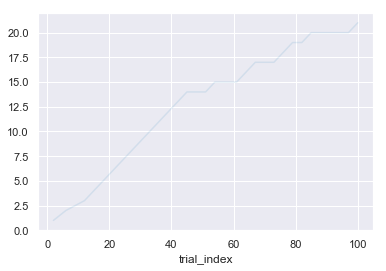

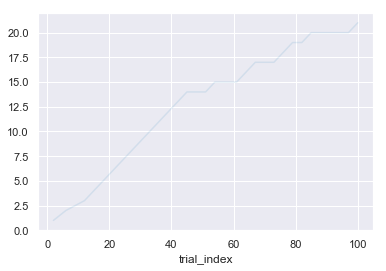

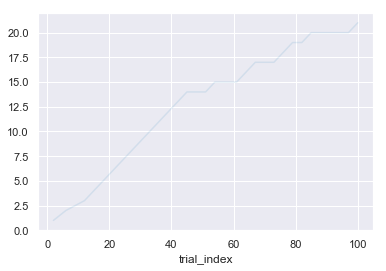

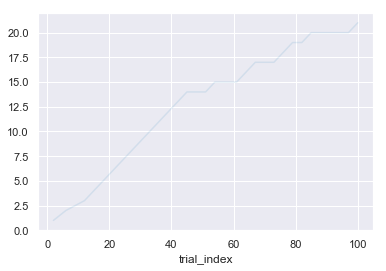

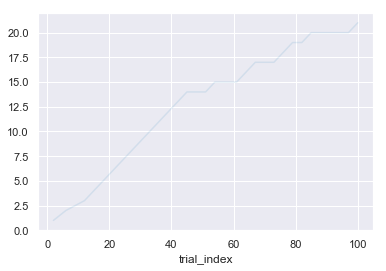

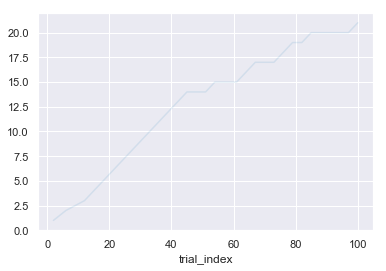

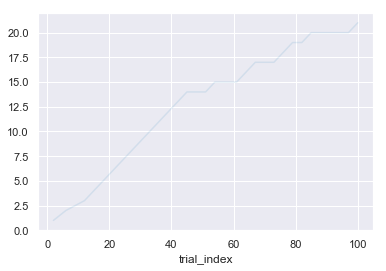

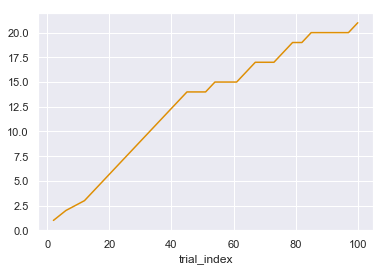

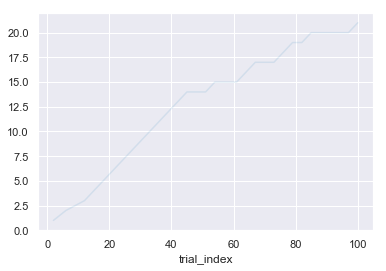

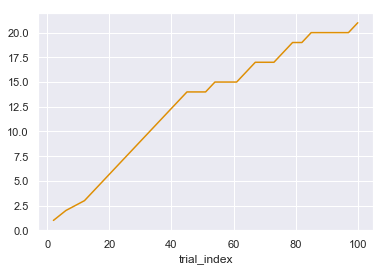

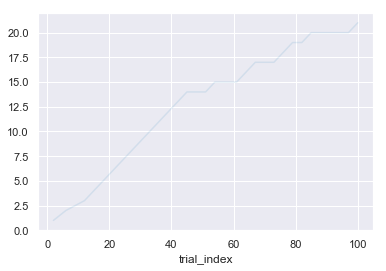

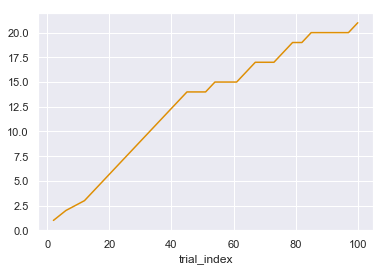

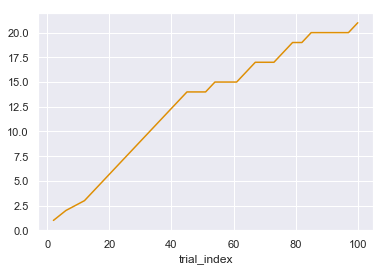

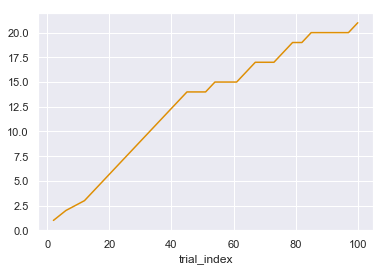

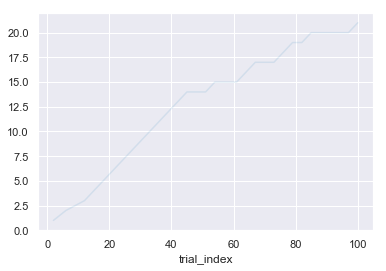

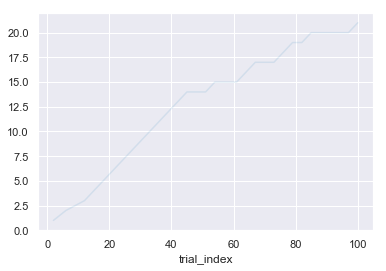

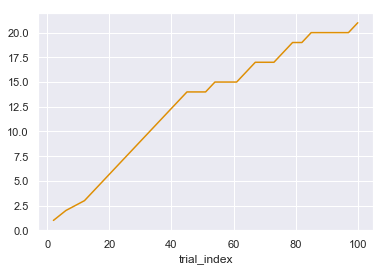

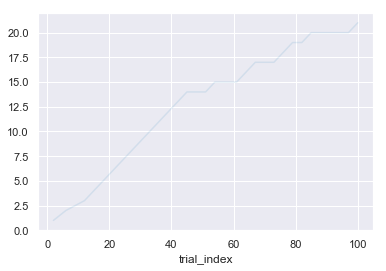

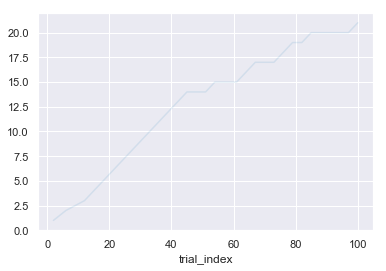

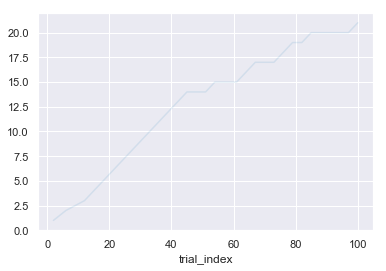

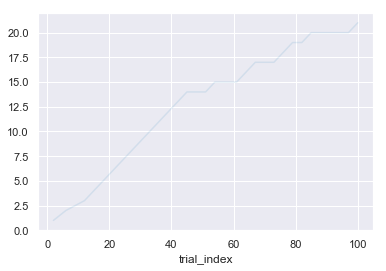

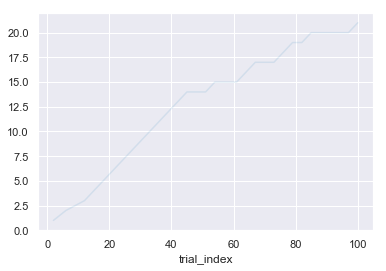

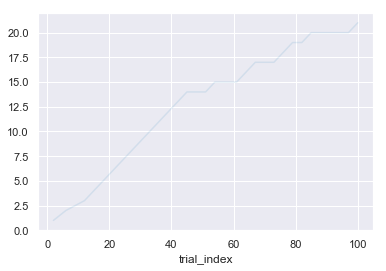

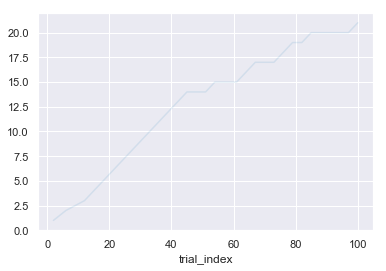

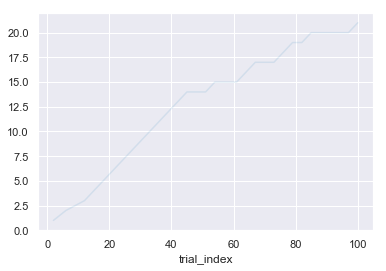

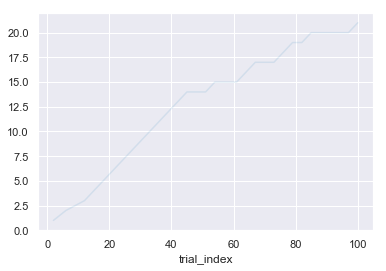

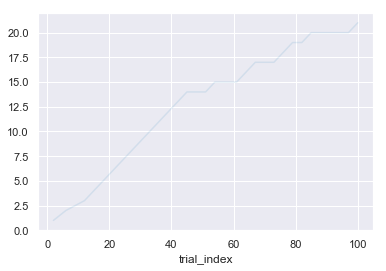

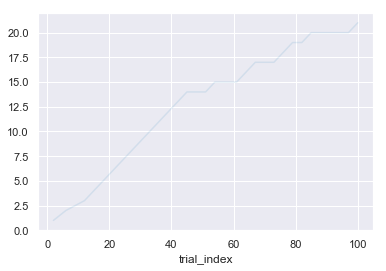

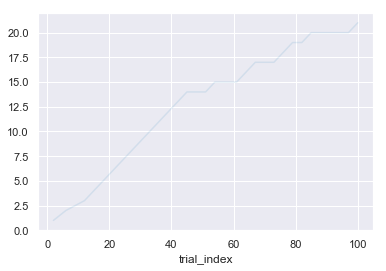

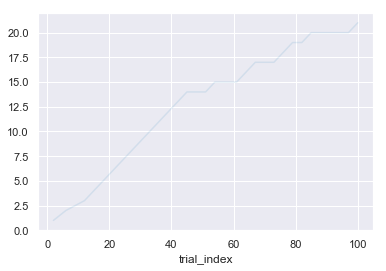

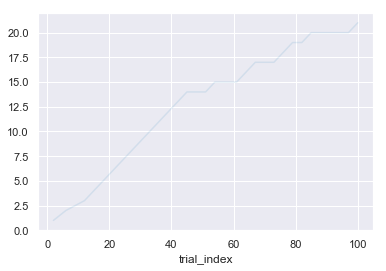

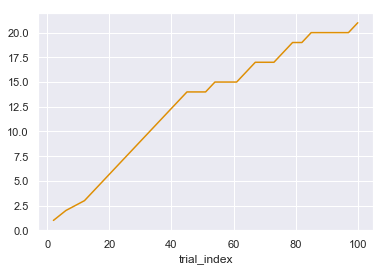

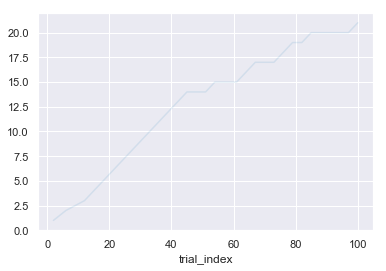

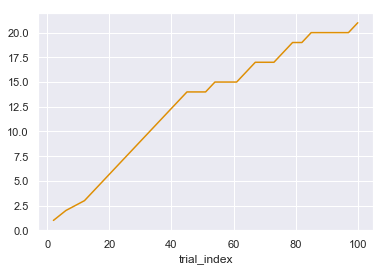

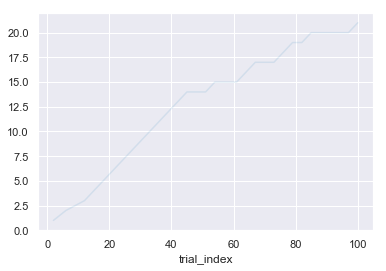

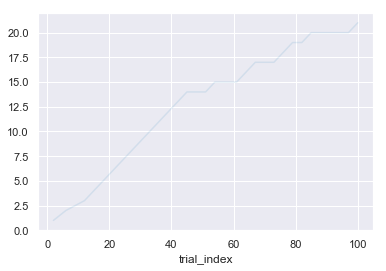

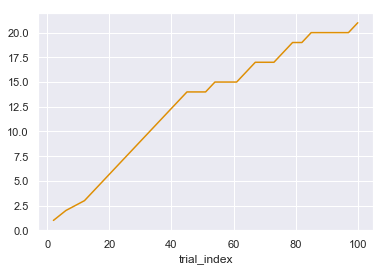

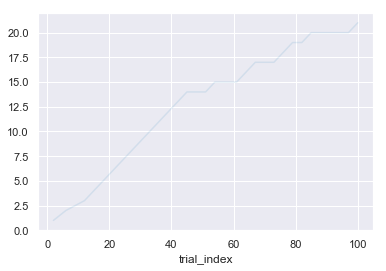

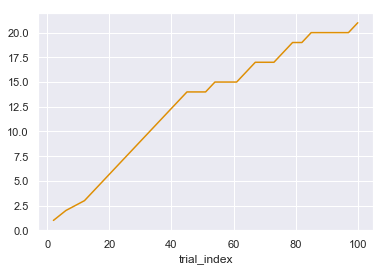

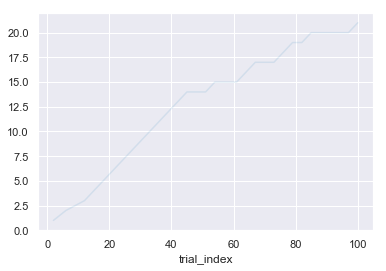

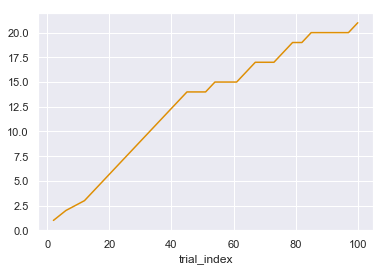

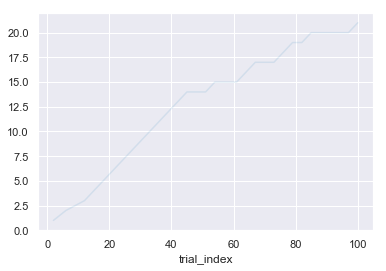

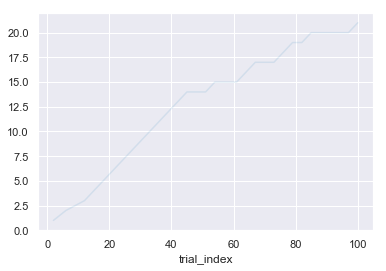

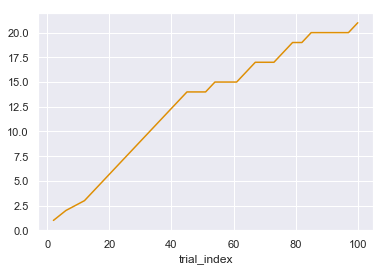

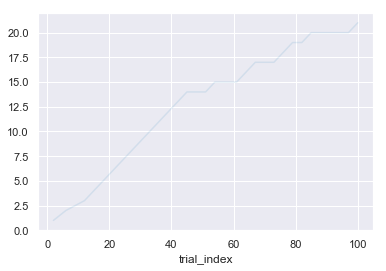

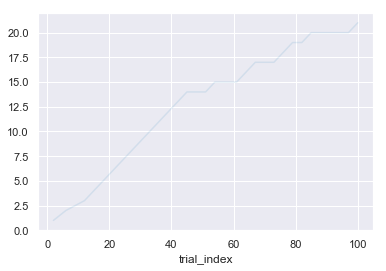

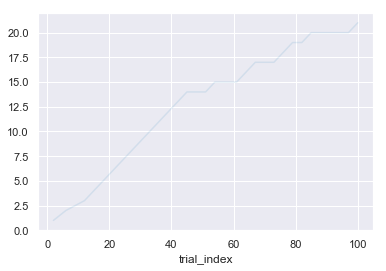

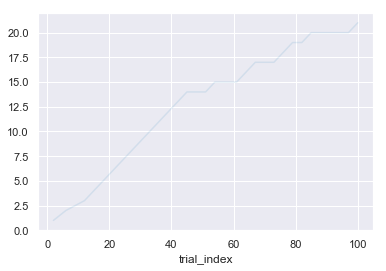

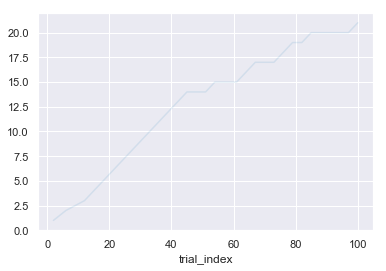

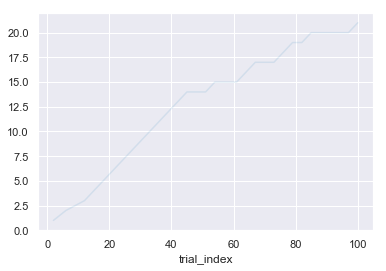

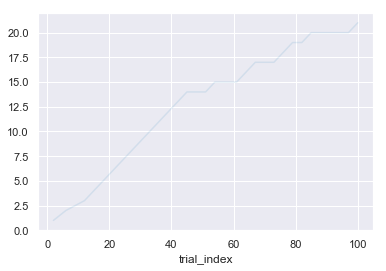

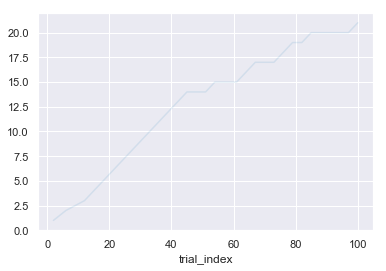

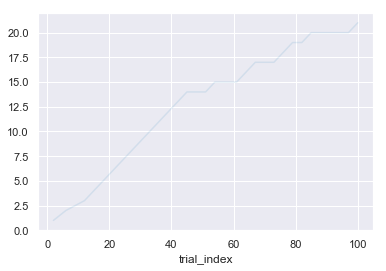

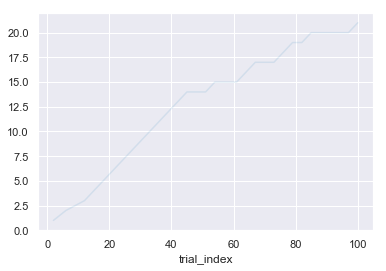

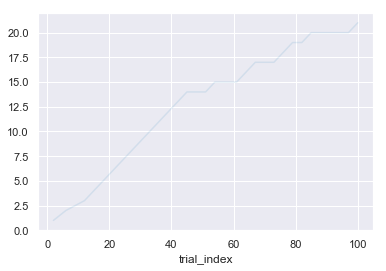

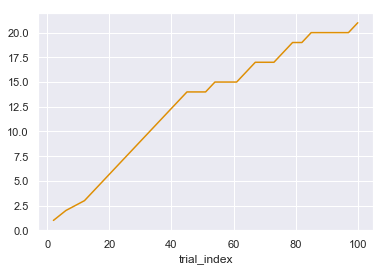

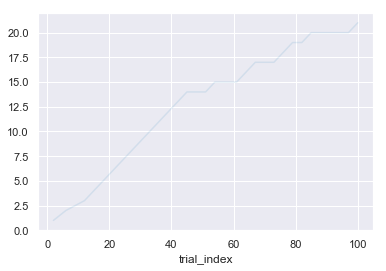

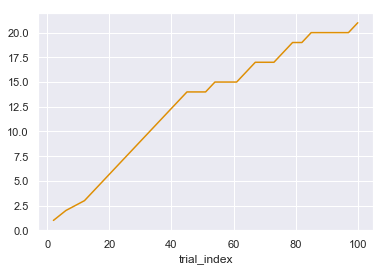

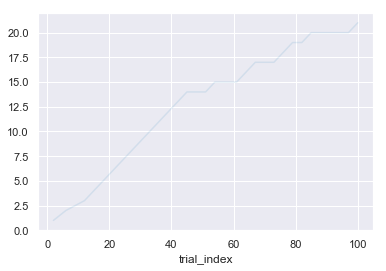

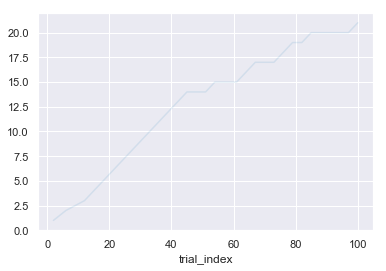

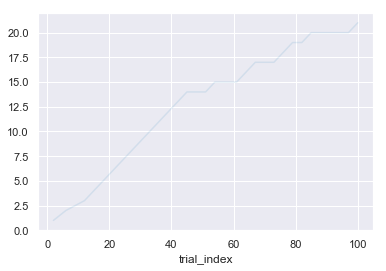

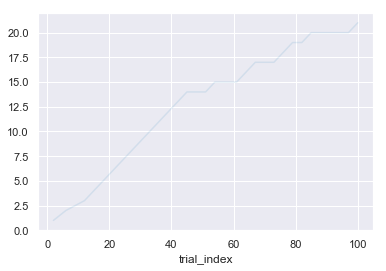

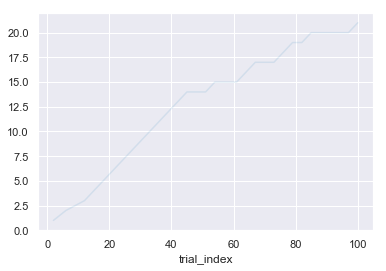

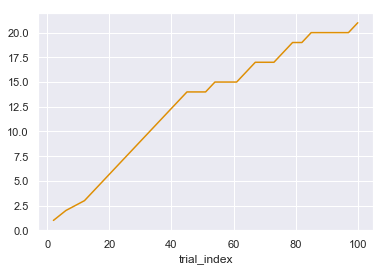

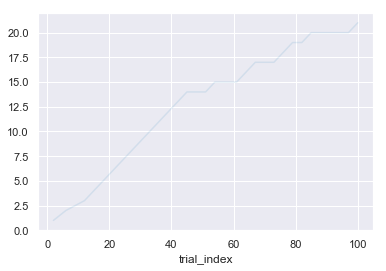

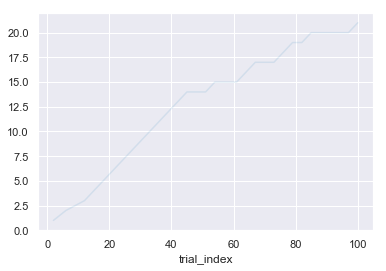

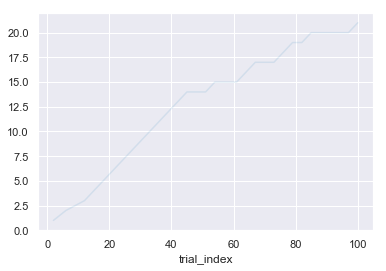

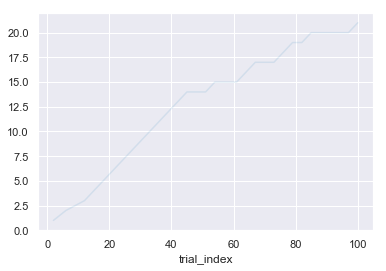

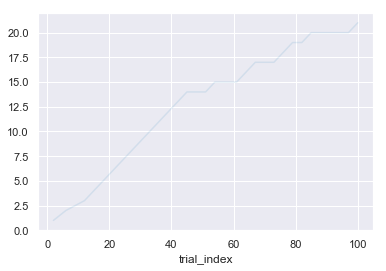

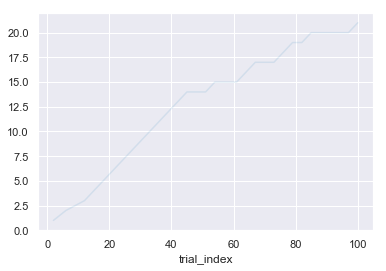

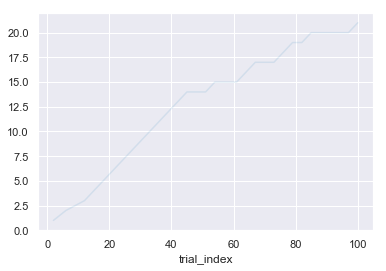

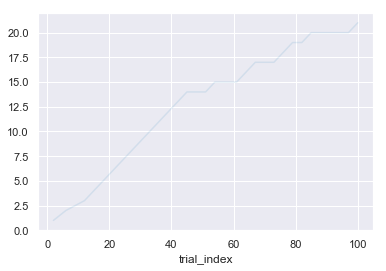

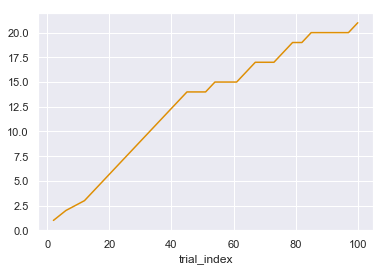

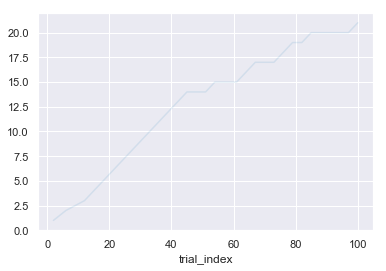

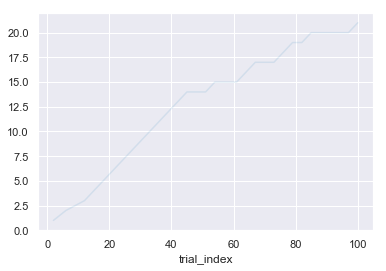

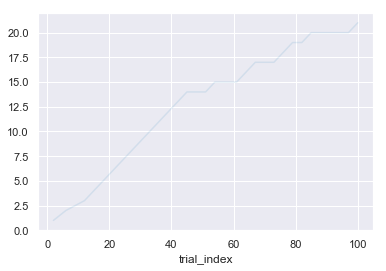

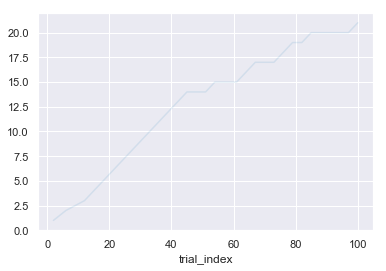

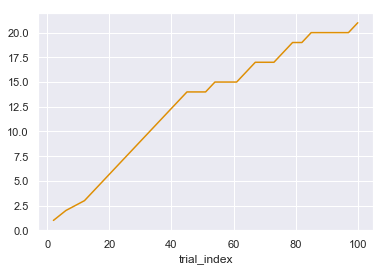

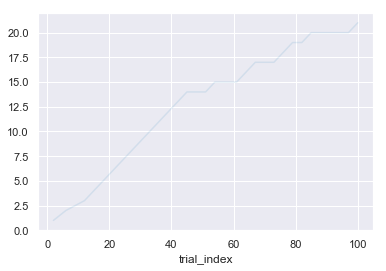

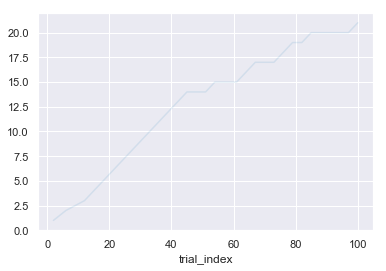

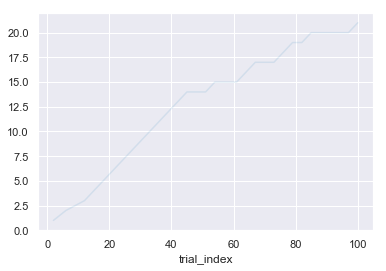

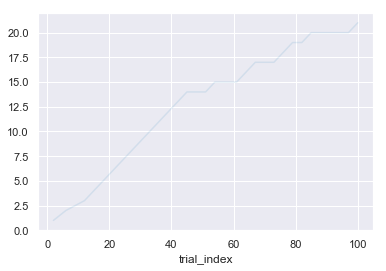

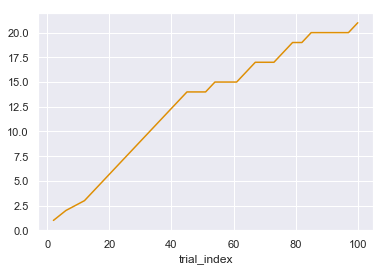

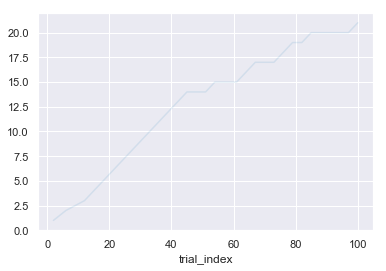

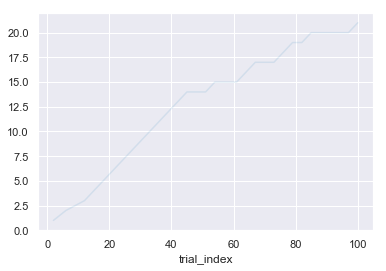

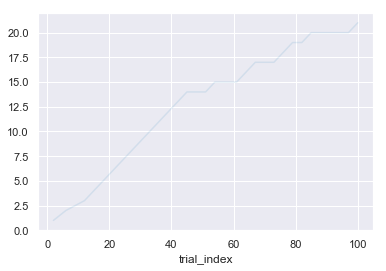

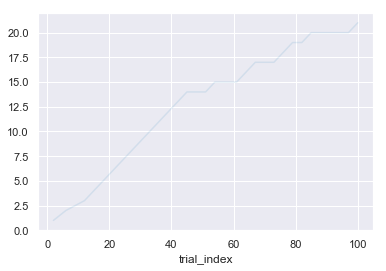

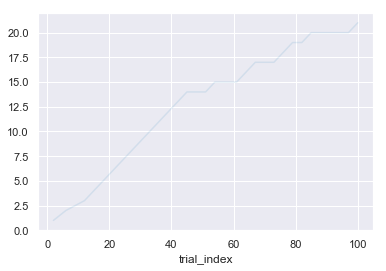

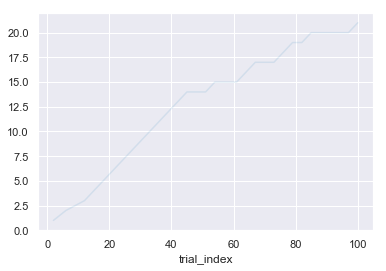

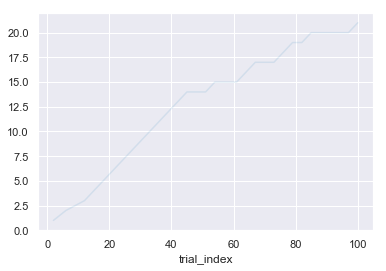

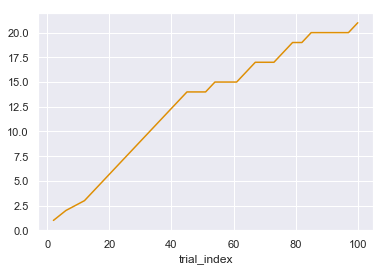

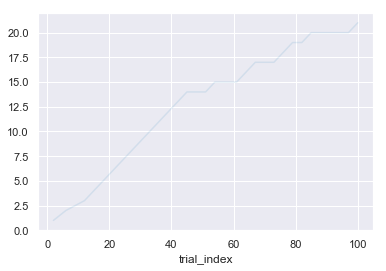

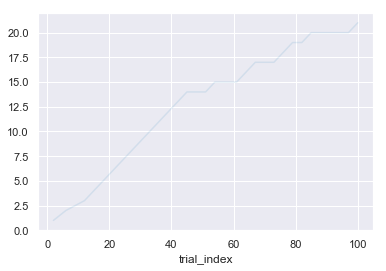

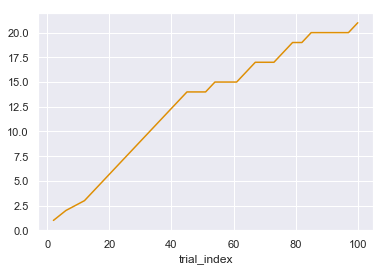

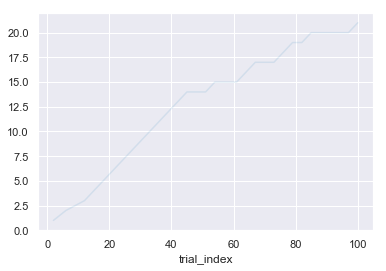

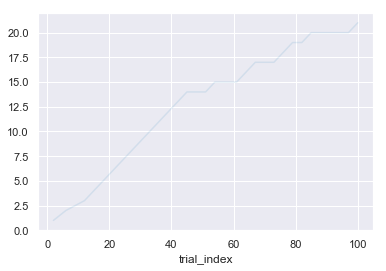

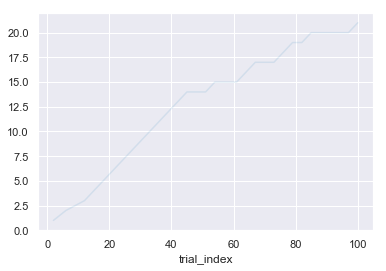

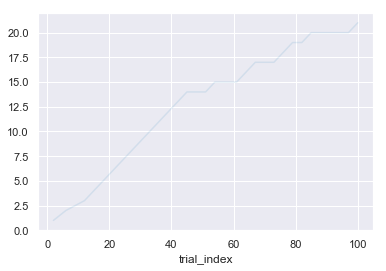

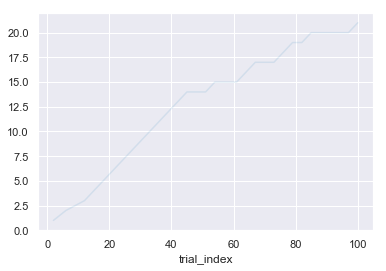

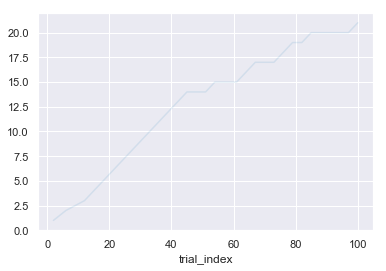

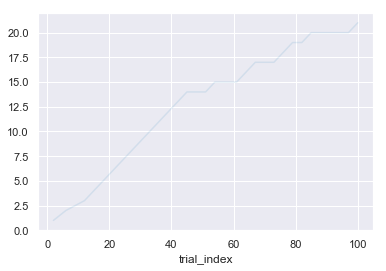

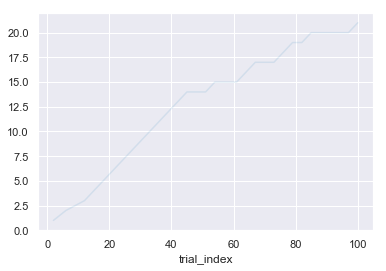

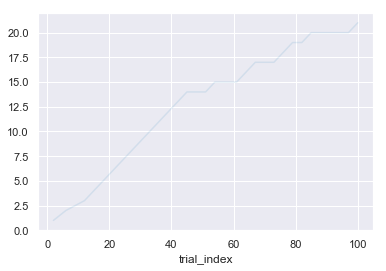

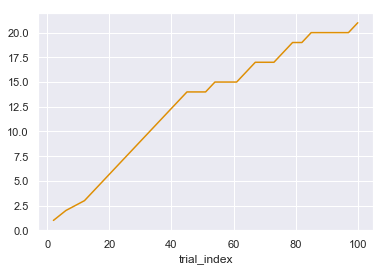

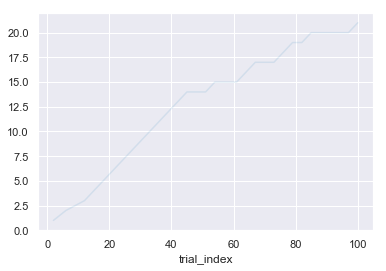

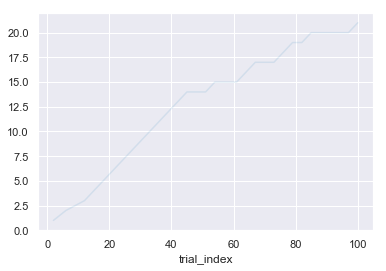

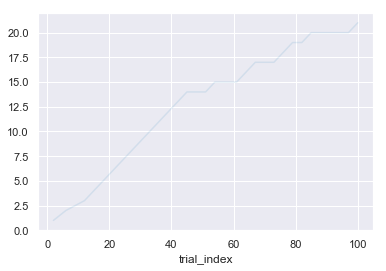

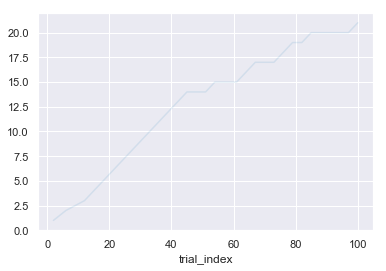

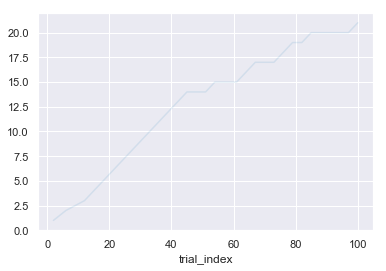

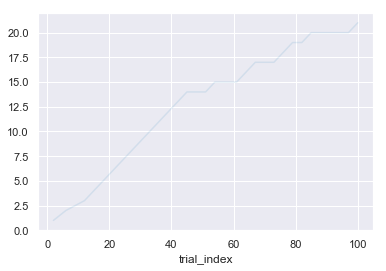

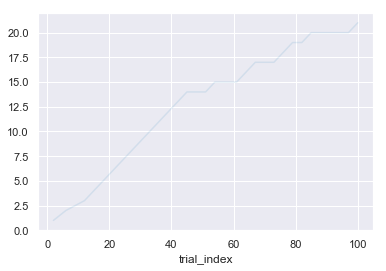

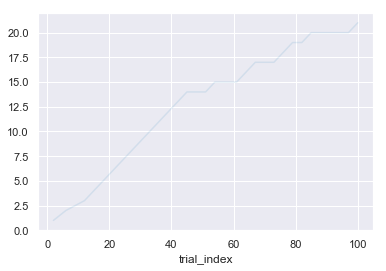

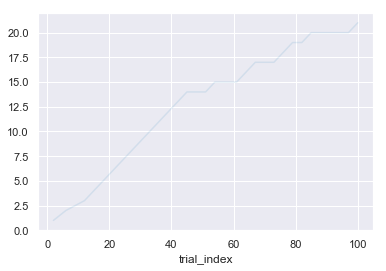

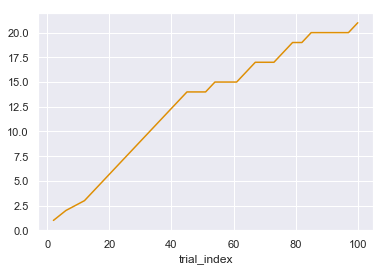

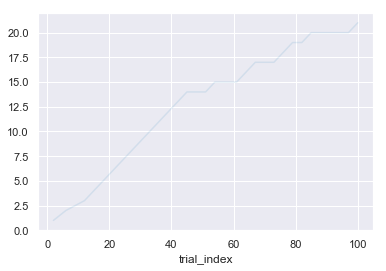

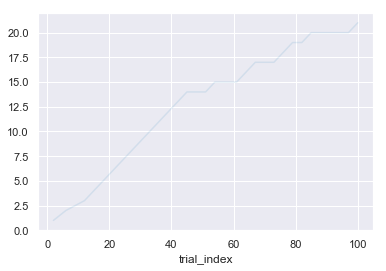

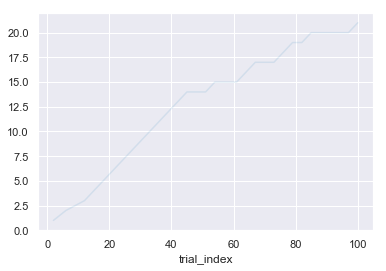

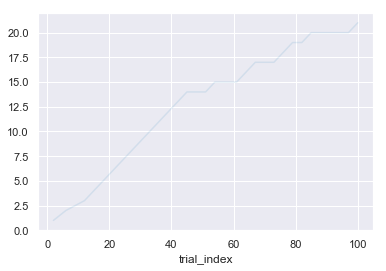

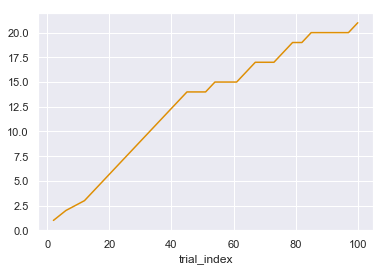

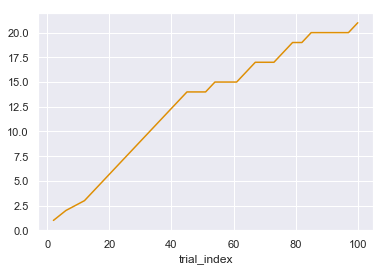

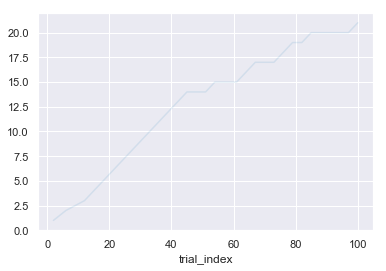

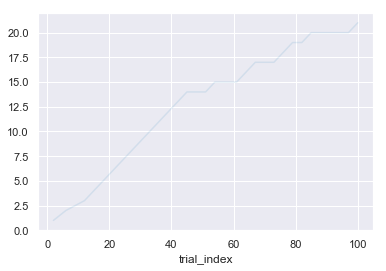

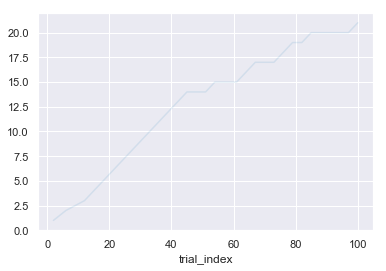

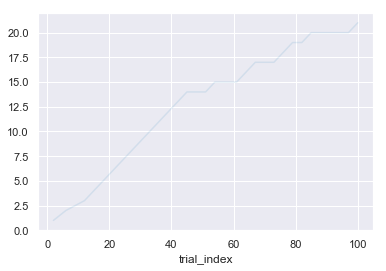

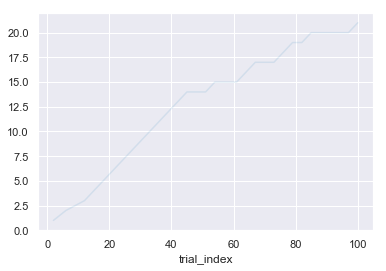

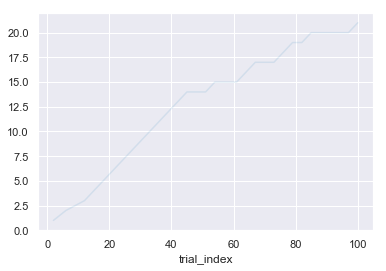

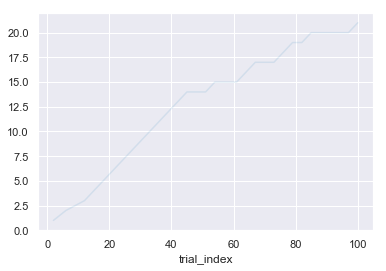

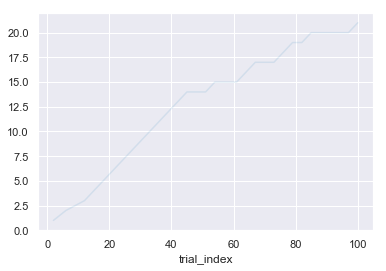

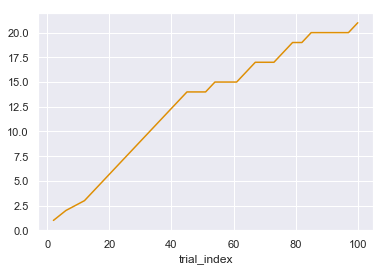

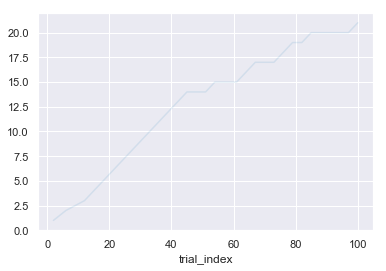

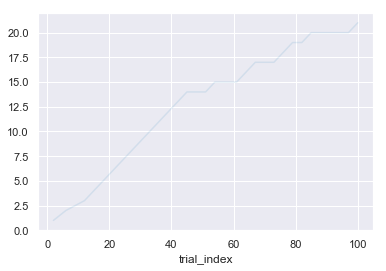

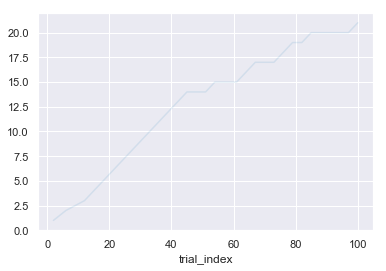

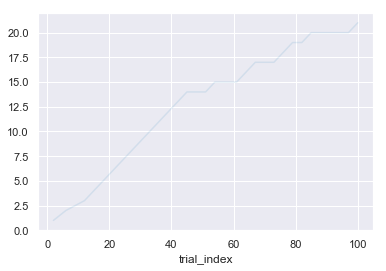

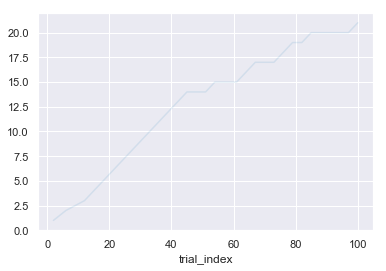

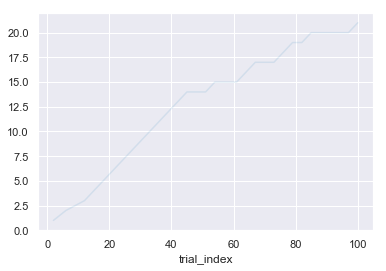

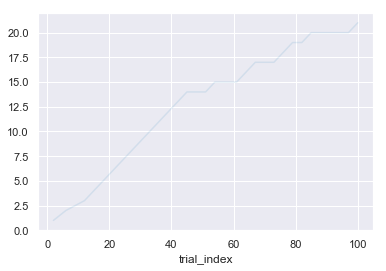

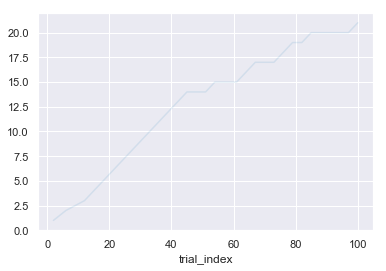

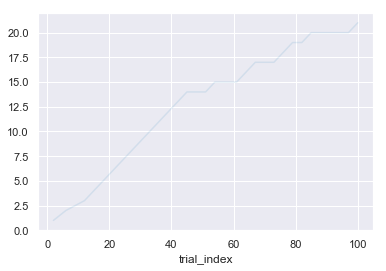

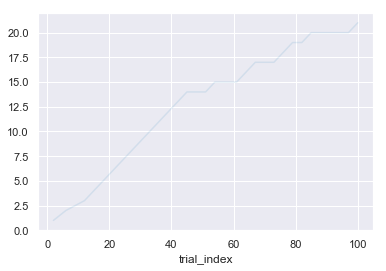

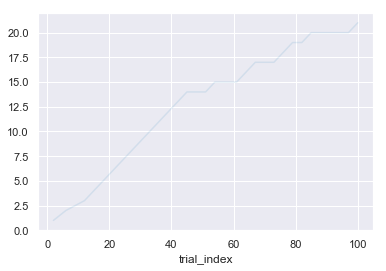

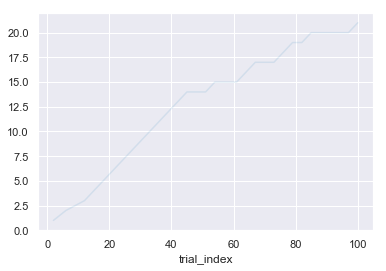

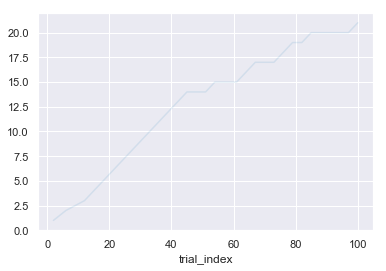

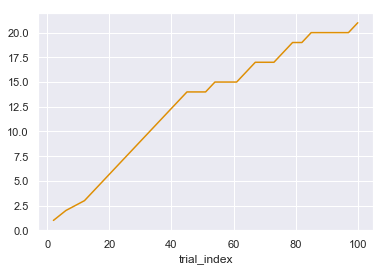

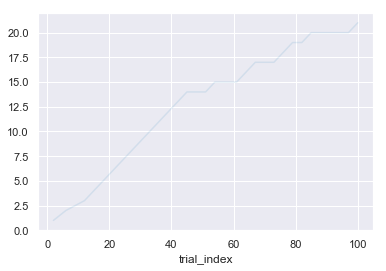

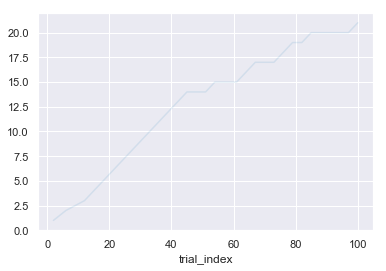

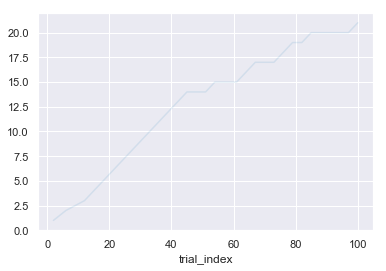

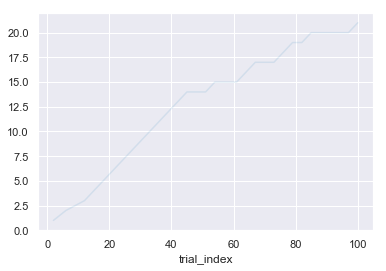

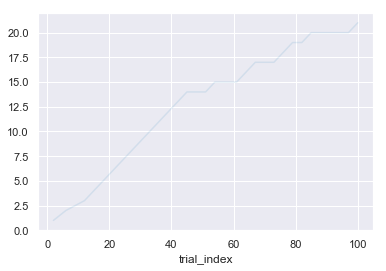

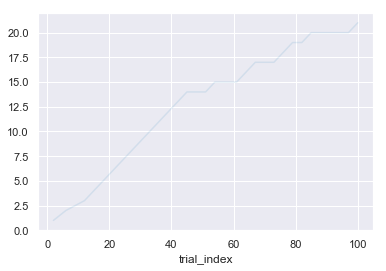

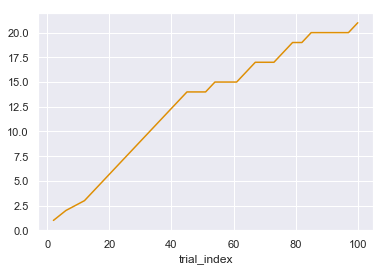

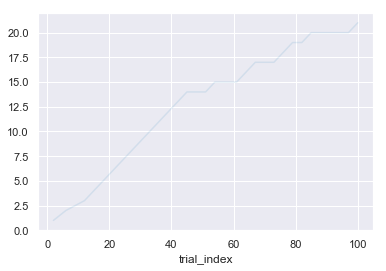

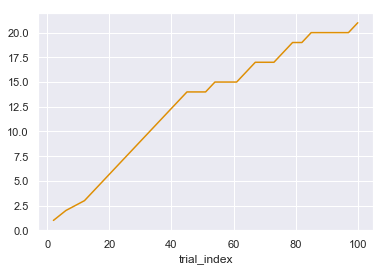

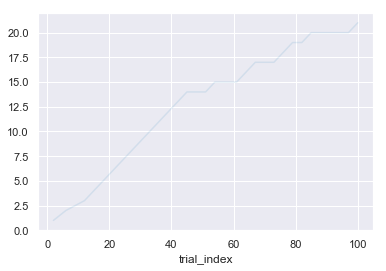

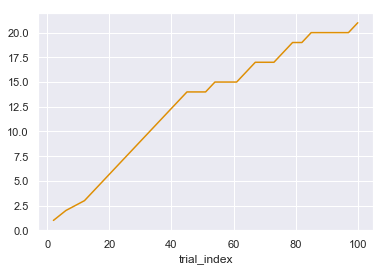

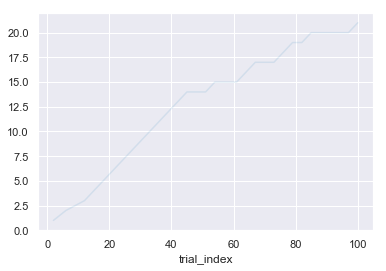

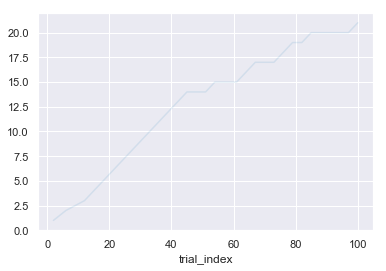

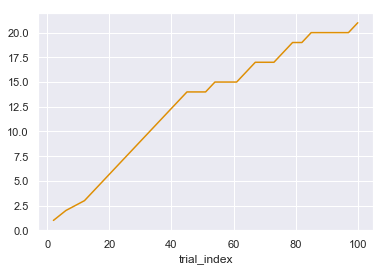

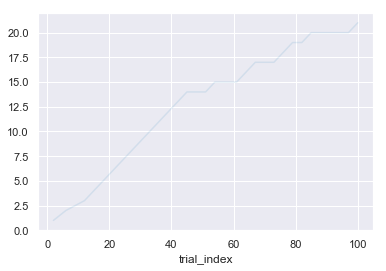

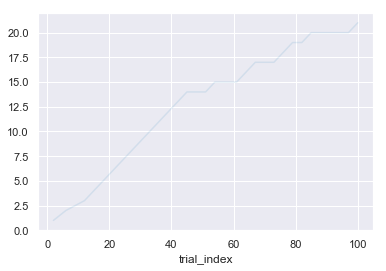

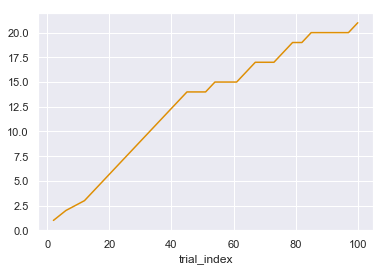

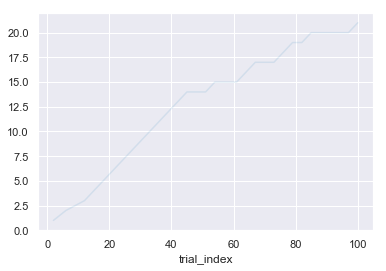

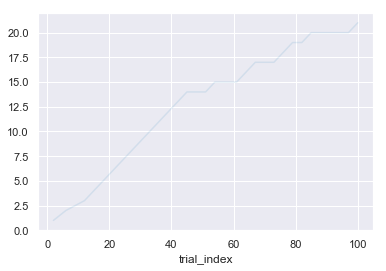

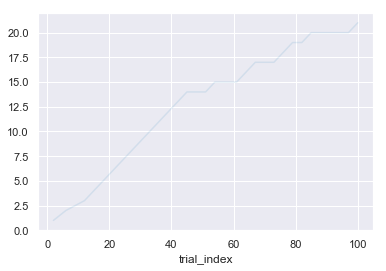

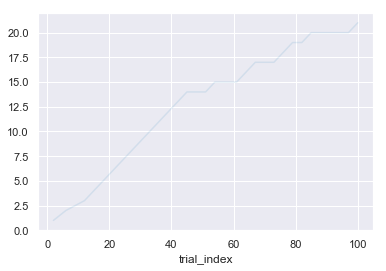

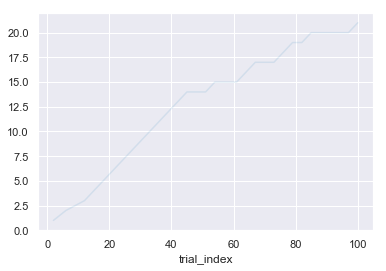

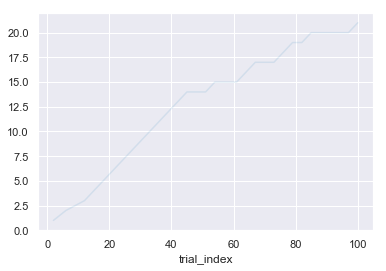

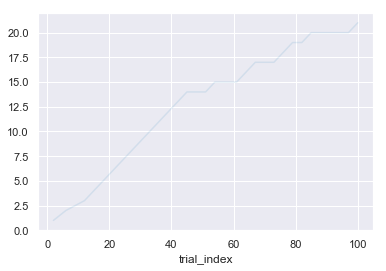

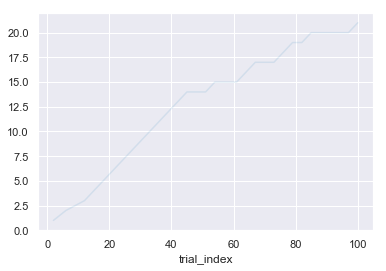

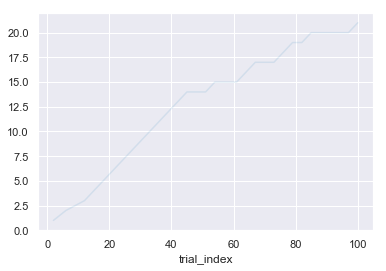

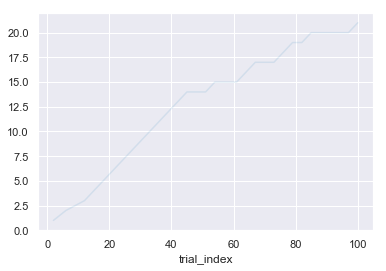

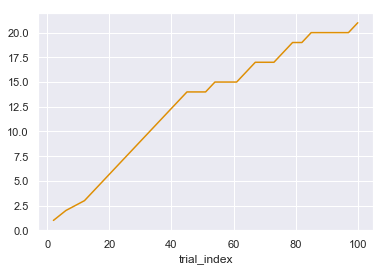

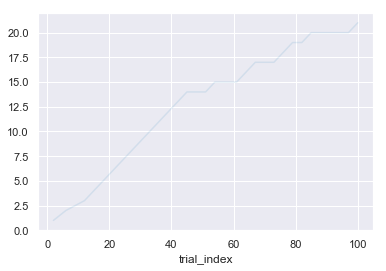

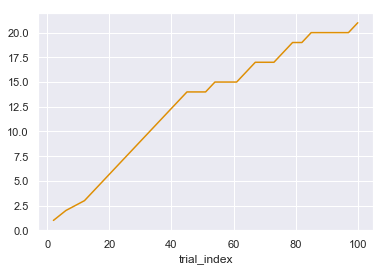

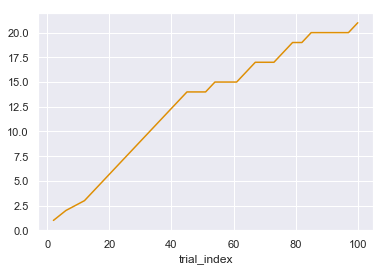

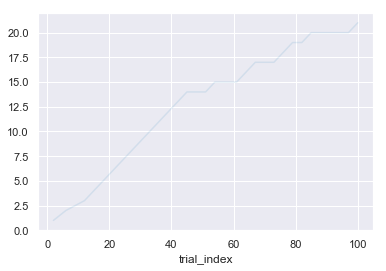

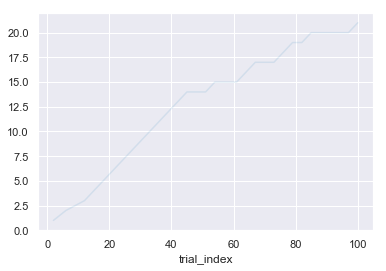

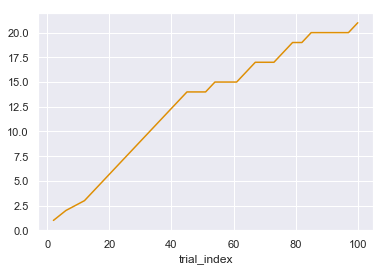

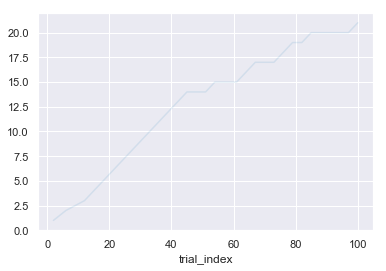

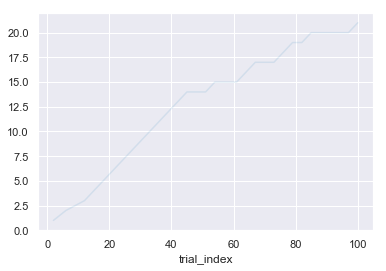

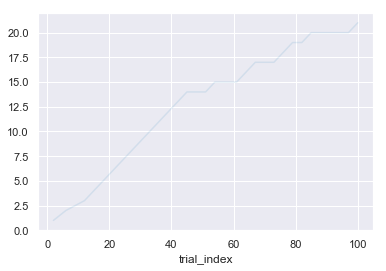

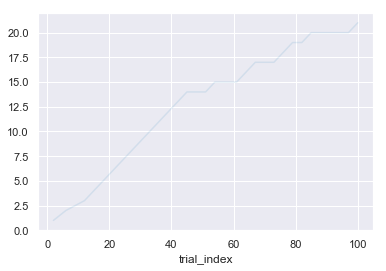

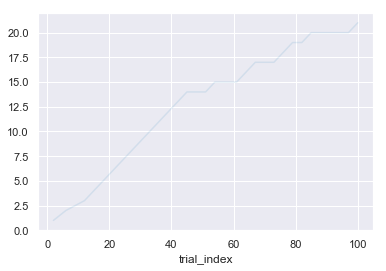

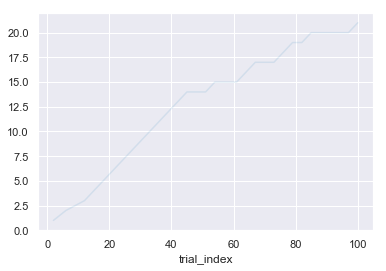

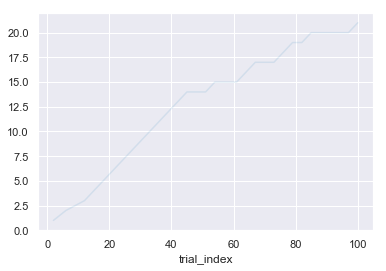

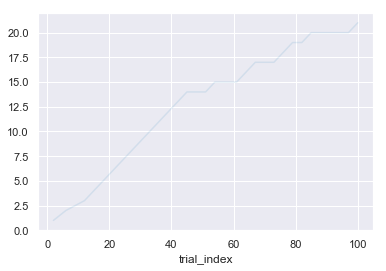

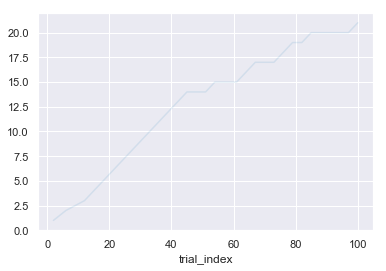

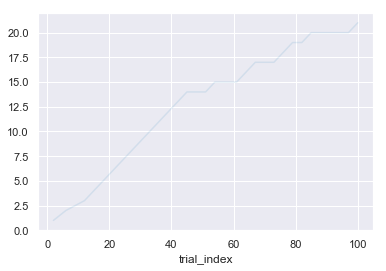

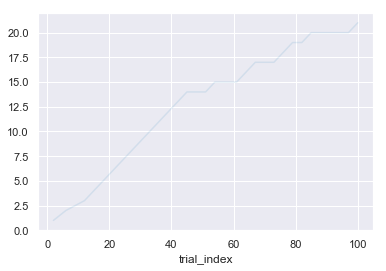

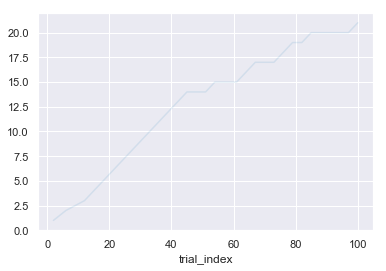

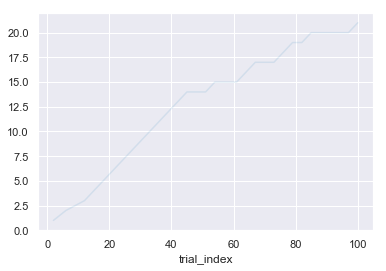

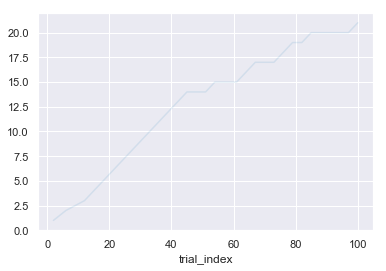

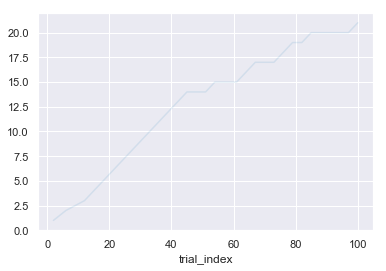

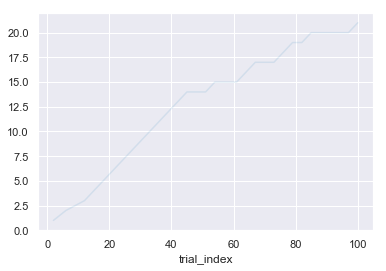

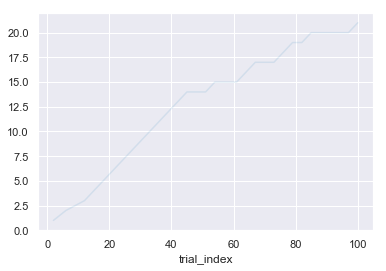

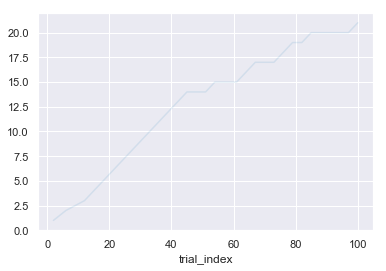

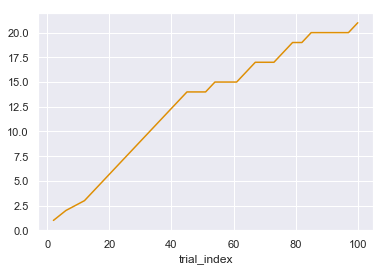

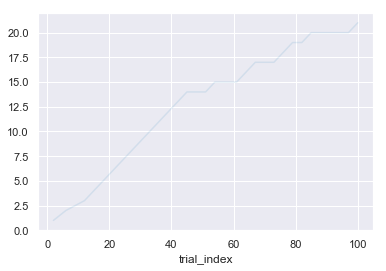

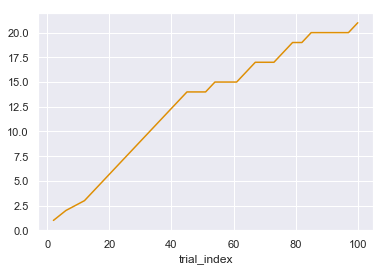

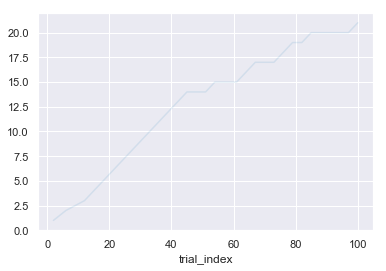

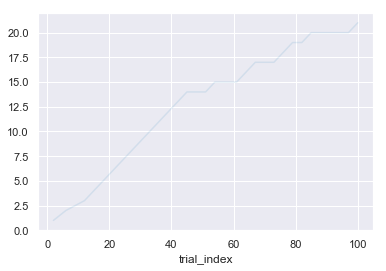

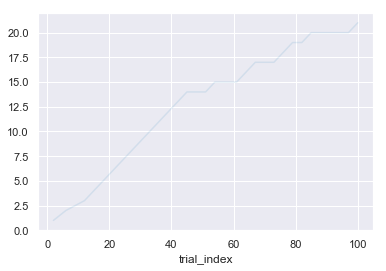

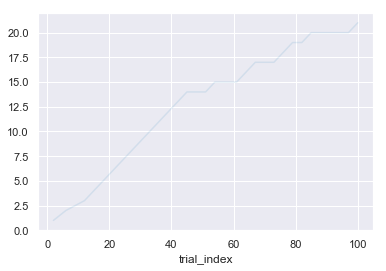

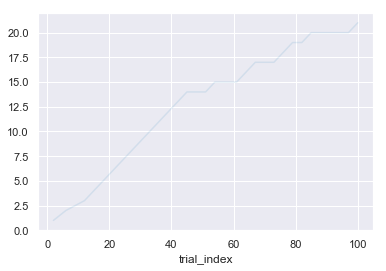

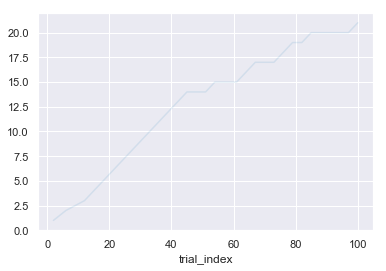

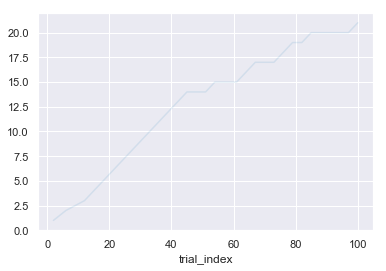

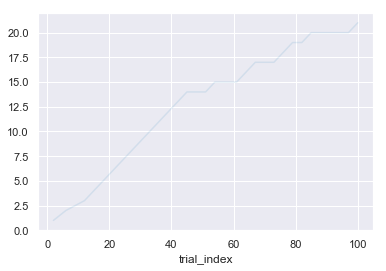

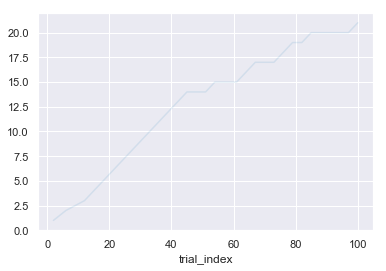

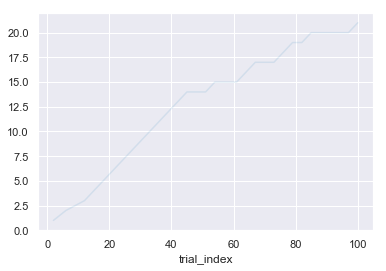

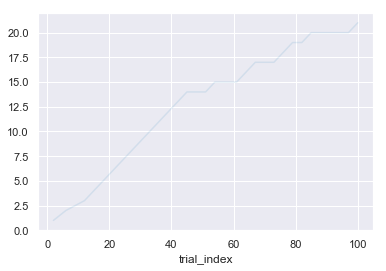

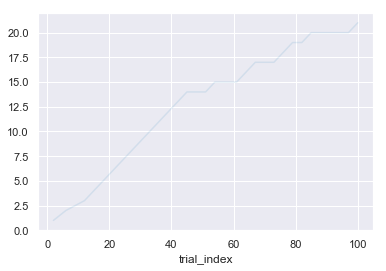

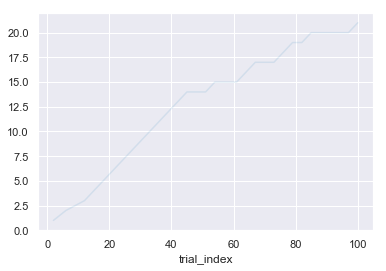

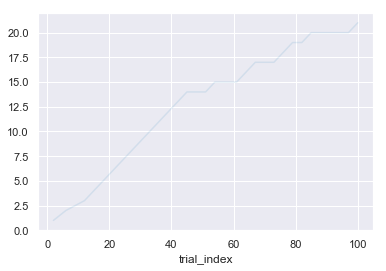

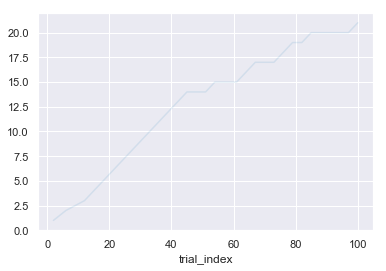

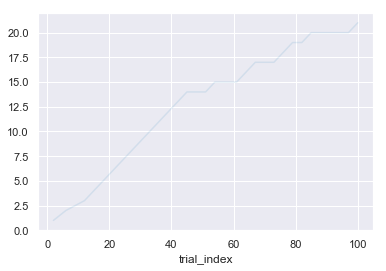

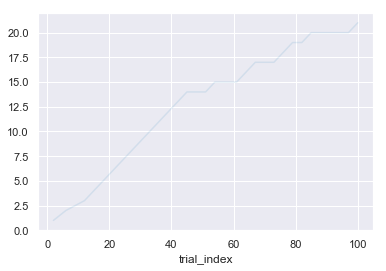

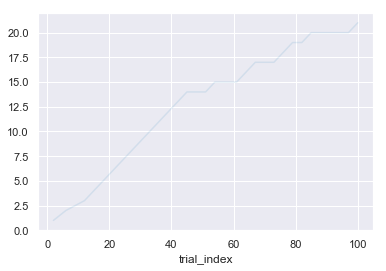

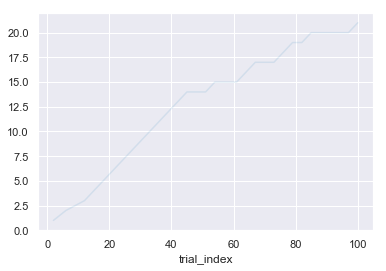

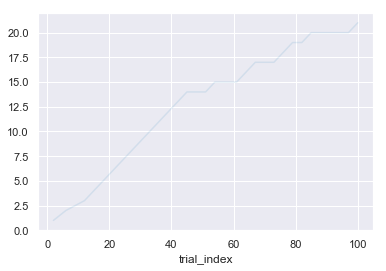

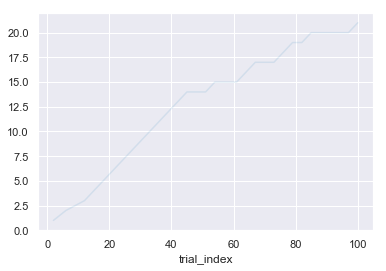

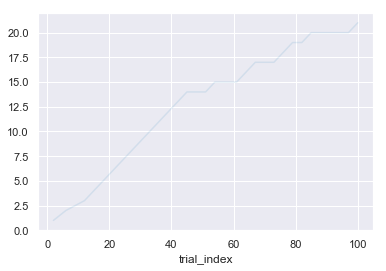

In [111]:
# wierd plot of turker scores 
df_score_uuid_grouped = df_data[['uuid', 'is_correct', 'trial_index']].groupby('uuid')

# test to get one plot
t = df_score_uuid_grouped.get_group('04e92bf9-ba34-4bfc-897c-39a470de1c18')
t.replace(to_replace={'is_correct' : {True: '1', False: '0'}}, inplace = True)
t['is_correct'] = t['is_correct'].apply(pd.to_numeric)
t['cum_score'] = t['is_correct'].cumsum().copy()
ax = t.plot(x='trial_index', y='cum_score')

def plot_score(df_plot):
    print(len(df_plot))
    if len(df_plot) == 32:
        df_plot.replace(to_replace={'is_correct' : {True: '1', False: '0'}}, inplace = True)
        df_plot['is_correct'] = df_plot['is_correct'].apply(pd.to_numeric)
        df_plot['cum_score'] = df_plot['is_correct'].cumsum().copy()
        uuid = df_plot.uuid.values[0]
        if uuid in df_turk.uuid.values:
            df_plot.plot(x='trial_index', y='cum_score', color='#de8f05', legend=False)
        else:
            ax_2 = df_plot.plot(x='trial_index', y='cum_score', color='#0173b2', legend=False, alpha=0.1)

df_score_uuid_grouped.apply(plot_score)

plt.show()
        
